In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Google Data Analytics Capstone Project
Produce a report with the following deliverables:

1. A clear statement of the business task


2. A description of all data sources used


3. Documentation of any cleaning or manipulation of data


4. A summary of the analysis


5. Supporting visualizations and key findings


6. Top three recommendations based on your analysis

# Business Task:

## Identify how annual members and casual riders use Cyclistic bikes differently.


### Key Possibilities:


#### Gender/Age data:

- Unfortunately, we don't have this data for casual riders, so we can't really use either feature to differentiate between casual and member riders. 

- Are there Gender or Age imbalances amongst members?


#### Rideable Type (bike type):

- What group is more likely to ride Docked bikes? Electric Bikes? Classic Bikes? 


#### Change over Time:

- How has traffic changed from 2013 to 2022? Does it differ significantly between member and non-member riders?


- How does traffic change over the course of a year, say on a monthly basis? This can help with a lot, specifically what I’m thinking of is when to run advertisements; it wouldn’t make sense to run the same volume of advertisements (assuming there are budget constraints) for membership sign-ups during the winter if the traffic is down compared to the summer. Does it differ significantly between member and non-member riders?


- What is the average ride time for members vs non-members? How does this average ride time vary over the course of a month or a year? What does this split look like?


- What is the most popular time of the day to start a bike ride? How does this change over the course of a year? Does it differ significantly between member and non-member riders?


- What day is the most popular/days are the most popular for bike riding? How does this change over the course of a year? Does it differ significantly between member and non-member riders?


#### Location and Destinations:

- What are the top 5 stations?

- What are the top 5 member stations?

- What are the top 5 non-member stations?


- What are the top 5 stations with the largest proportion of member riders?

- What are the top 5 stations with the largest proportion of non-member riders?


- What is the city split? 

- What is the member/non-member split based on such trips?


- How many trips are associated with landmarks, and how does this vary based on usertype?

# The Data

The data was retrieved from https://divvy-tripdata.s3.amazonaws.com/index.html on 11/11/2022.

The data is from the Chicago based bike rental company 'DIVVY', and the dataframe is comprised of bike rides of customers from the date 7/3/2013 to 11/8/2022.

Each row is an individual bike trip from one station to another.

The data is indexed according to the start_time and start_date, so each row is in chronological order in terms of ride start date-time.

This data was heavily cleaned and processed, and I will include all of the cleaning in a folder along with this upload on github. 

In [2]:
bike_df = pd.read_csv('1 Full Divvy Dataframe final.csv',
                      index_col=0,
                      dtype={
                     'trip_duration': 'int16',
                     'usertype': 'int8',
                     'gender': 'int8',
                     'birthyear': 'int16',
                     'rideable_type': 'int8',
                     'start_city': 'int8',
                     'start_landmark': 'int16',
                     'end_city': 'int8',
                     'end_landmark': 'int16',
                     'start_dpcapacity': 'int8',
                     'end_dpcapacity': 'int8',
                     'age': 'int8',
                     'st_hour': 'int8',
                     'st_minute': 'int8',
                     'st_second': 'int8',
                     'ed_hour': 'int8',
                     'ed_minute': 'int8',
                     'ed_second': 'int8',
                     'st_year': 'int16',
                     'st_month': 'int8',
                     'st_day': 'int8',
                     'ed_year': 'int16',
                     'ed_month': 'int8',
                     'ed_day': 'int8'})

In [3]:
bike_df['start_date'] = pd.to_datetime(bike_df['start_date'], format='%Y-%m-%d')
bike_df['end_date'] = pd.to_datetime(bike_df['end_date'], format='%Y-%m-%d')

bike_df['st_day_name'] = bike_df['start_date'].dt.day_name()
bike_df['ed_day_name'] = bike_df['end_date'].dt.day_name()

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33026386 entries, 0 to 33026385
Data columns (total 38 columns):
 #   Column              Dtype         
---  ------              -----         
 0   start_time          object        
 1   end_time            object        
 2   trip_duration       int16         
 3   start_station_id    object        
 4   start_station_name  object        
 5   end_station_id      object        
 6   end_station_name    object        
 7   usertype            int8          
 8   gender              int8          
 9   birthyear           int16         
 10  start_lat           float64       
 11  start_lng           float64       
 12  end_lat             float64       
 13  end_lng             float64       
 14  rideable_type       int8          
 15  start_city          int8          
 16  start_landmark      int16         
 17  end_city            int8          
 18  end_landmark        int16         
 19  start_date          datetime64[ns]
 20  

# Features

1 - start_time: The ride's start time on a military time scale between 00:00:00 and 23:59:59

2 - end_time: The ride's end time on a military time scale between 00:00:00 and 23:59:59

3 - trip_duration: The total ride time, derived through finding difference between start and end times. Potential differences
in day started and day ended are taken into account.

4 - start_station_id: The unique id of the station where the ride begins

5 - start_station_name: The name of the station where the ride begins

6 - end_station_id: The unique id of the station where the ride ends

7 - end_station_name: The name of the station where the ride ends

8 - usertype: If rider is a casual = 0 , if rider is a member = 1

9 - gender: 0 is male, 1 is female, -1 means that the value is invalid (it was a null). Only recorded from 2013-2019, null begining in 2020.

10 - start_lat: The latitude value of the bike at the beginning of its ride

11 - start_lng: The longitude value of the bike at the beginning of its ride

12 - end_lat: The latitude value of the bike at the end of its ride

13 - end_lng: The longitude value of the bike at the end of its ride

14 - rideable_type: Classic bike/Docked bike: 0, Electric bike: 1

15 - start_city: City where start_station is located. Chicago: 0, Evanston: 1, Oak Park: 2

16 - start_landmark: Landmark where start_station is located

17 - end_city: City where end_station is located. Chicago: 0, Evanston: 1, Oak Park: 2

18 - end_landmark: Landmark where end_station is located

19 - start_date: The date when the ride begins

20 - end_date: The date when the ride ends

21 - start_dpcapacity: The docking point capacity of the start_station, or the maximum number of bikes that can be held at the station)

22 - end_dpcapacity: The docking point capacity of the end_station, or the maximum number of bikes that can be held at the station)

23 - age: The age of the person on the ride. If age = 0, this means that the data does not exist. Only recorded from 2013-2019, null begining in 2020.

24 - st_hour: standalone ride start hour

25 - st_minute: standalone ride start minute

26 - st_second: standalone ride start second

27 - ed_minute: standalone ride end hour

28 - ed_minute: standalone ride end minute

29 - ed_second: standalone ride end second

30 - st_year: standalone ride start year

31 - st_month: standalone ride start month

32 - st_day: standalone ride start day

33 - ed_year: standalone ride end year

34 - ed_month: standalone ride end month

35 - ed_day: standalone ride end day

36 - st_day_name: standalone ride start day name

37 - ed_day_name: standalone ride end day name


## Deleted Features

Some features were deleted because of their lack of relevance to the data analysis process.

trip_id/ride_id: Was the unique trip/ride id code used to make sure that each ride being saved was unique. Used to eliminate repeat values, and dropped after elimination because the trip/ride code itself contributes nothing to analysis process.

bike_id: Deleted because it was not carried on through the all of the data, and information such as location data for mapping out bike paths is not included in this dataset. Only the start and end locations of bikes are present in the dataset, thus making any information to be gleaned about specific bike paths incomplete.

birthyear: Used to figure out age at time of trip. Removed because obtaining age is the end goal of birthyear in a dataset such as this, so birthyear itself is rendered unecessary.

# Data Cleaning and Processing Summary

There are many input variables included in this dataset. This dataset is large enough that it caused constraints on how to handle it. It was necessary in some parts of the data cleaning process to break the task into individual parts in order to avoid memory errors from the lack of avaliable memory on my machine. 

Containing the sheer size of the dataset in addition to the objects required to be merged and preserved for editing purposes posed a challenge to my hardware. Here is a general overview of the data cleaning and compilation process.


1. Each of the individual files was sorted into a seperate folder by year. Because the data has 3 different formats from 2013 to 2022, it needed to be processed on a year level, then format level, and finally a combined level.


2. The data came in multiple formats, and the data from 2013 - 2017 contained station specific data, such as id values, landmarks, latitude and longitude values, bike capacity, and the date that the station was created.


3. On a year by year basis, the actual bike trip data was stitched together and processed so that each year had a single file containing the combined entire year's worth of data.


4. There are many fixes to tiny errors along the way for the mutitude of errors involved with this being my first comprehensive, start to finish data cleaning and manipulation project. I had a lot of hardware constraints as this is such a large amount of data, I tried to put all of the cleaning process into a single file so that it would be easier to track, however I simply cannot run the entire file without my computer crashing. Unfortunately this means that some of my process will be obscured because of how split everything is, but the main cleaning occurs in the higher level merges (format level and full dataframe level).


5. At the format level, there are three groups of data: 2013-2017, 2018-2019, and 2020-2022. Each respective group of years are concatenated together and has minor issues fixed, as well as removing duplicate rows and duplicate rows based on a trip_id subset. Afterwards, each are grouped together in '1 Full Divvy Dataframe pt1' through '1 Full Divvy Dataframe pt6'. 

## Full Dataframe Cleaning Files Summary


### Pt.1: 1 Full Divvy Dataframe pt1

- Pt1 loads and concatenates all the different format level csv files together, renames all of the columns to a common format, and fills in any nulls or missing values that would be a result of concatenating dataframes with different numbers of features. The data is then re-indexed and fed through a function that checks for invalid date and time combinations. For example, all rides with more than 1 day's worth of time between the 'start_date' and 'end_date' values for each ride is dropped. All rides where the 'start_date' is after the 'end_date' are dropped. We also then convert all the start_time and end_time values to the same format (HH:MM:SS). We then remove all values where the 'start_date' and the 'end_date' are the same but the 'start_time' is chronologically after the 'end_time'. We then save to a csv file as around here computer starts crashing.


### Pt.2: 1 Full Divvy Dataframe pt2

- Pt2 loads Pt1 csv file and renames the variables to more convinient names. The data is then sorted on a subset ['start_date','start_time'] which is the date and time of the ride start. I noticed that many stations have duplicate names or are named differently across format levels, and that they need to be changed on a name by name basis. I tried to start this process by utilizing the station_id values for each station to figure out how to aggregate the stations. What I found is that there are indeed many stations in our dataset that have different names based on the formating of each year group (2013-2017, 2018-2019, 2020-2022) and that they needed to be manually reviewed in order to be properly sorted out. I did this manually, but have included in the notebook file all of the id values that needed to be purely aggregated together or dealt with seperately. I then defined a function 'fix_id' that is able to aggregate all of the rides to a single name per station that had multiple names due to the format group, and I also found that many of the names of our stations were not actually the names that divvy themselves assigned to the stations, so these were renamed. I then went on to fix all of the remaining station_id values that had multiple station names associated with them by assigning new, similar ID values on a case by case basis. Save to csv at the end.


### Pt.3: 1 Full Divvy Dataframe pt3

- Pt3 loads the Pt2 csv file and examines dpcapacity. The dpcapacity is the maximum capacity for the bike station (as far as I know). It was missing for many station names, so I assigned manually searched values to roughly 600 stations. I also flagged stations for correction by assigning them a values of -1 because I realized through manually searching that the respective stations needed fixing (station was misnamed but actually represented another station, had very few rides, had something incorrect when I queried to find the values associated with the station name in the data, etc. This was a ton of work, and required in many cases google maps street searches to find the values for the capacity through manually counting the number of bike docks at the station. Finally, any stations flagged for deletion were deleted and then the data is saved to a csv file.


### Pt.4: 1 Full Divvy Dataframe pt4

- Pt4 loads the Pt3 csv file. Pt4 is similar to Pt3 in that I manually fixed the city values for any station that had missing city labels. Any city had a 0 (Chicago) as the value in their column was manually searched to make sure that the city was actually within Chicago. If it was not, the value was changed to 1 or 2 respective of the city. The data is then saved to a csv file.


### Pt.5: 1 Full Divvy Dataframe pt5

- Pt5 deals with the birthyear column and creates an 'age' column out of it by subtracting the bithyear from the year that the ride actually occurs. Any value of age over 100 years old is flagged and the row is dropped (even this is probably generous). Afterwards, any station where there are rides only to the station or only from the station is dropped (as there is such a low ride count that the station is not worth including in our data). Landmark column fixes are also made after this. Any station with a '0' value is not associated with a landmark that was listed in the original data. Lastly, the values are sorted by ['start_date', 'start_time', 'trip_duration'].


### Pt.6: 1 Full Divvy Dataframe pt6

- Pt6 loads the Pt5 file, and is the final part of the cleaning. It goes over station_id's again and fixes the few stations remaining with multiple id values for single station names. We then take a look at outliers. There is only one actual continous value in this entire dataset; trip_duration. I decided to delete all rows with more than three hours or 10800 seconds of trip_duration, as this went up to around 80000 seconds (which is almost a full day). These values accounted for roughly 1/3 of a percent of the data, and would make data visualization more difficult. They also detracted from the point of the exercise which is to examine the tendencies of people who ride our bikes, so they were removed. Lastly, final datatypes are determined so that the size of the dataframe can be reduced when manipulating it for data analysis, which means that it is less likely to crash my computer. The file is then saved to a csv. That is the file that is being used for the analysis in this notebook, and is named '1 Full Divvy Dataframe final.csv'.

# Exploratory Data Analysis
## Feature Correlation Heatmap

I want to see if there are any relationships between variables that are independent and significant. Our correlation heatmap will exclude variables that are entirely dependent on each the station choice. Also, we must watch out for dependencies on usertype: age and gender values don't exist for Casual riders, so there is a dependency there that means we shouldn't use a correlation between usertype --> age or gender is not 

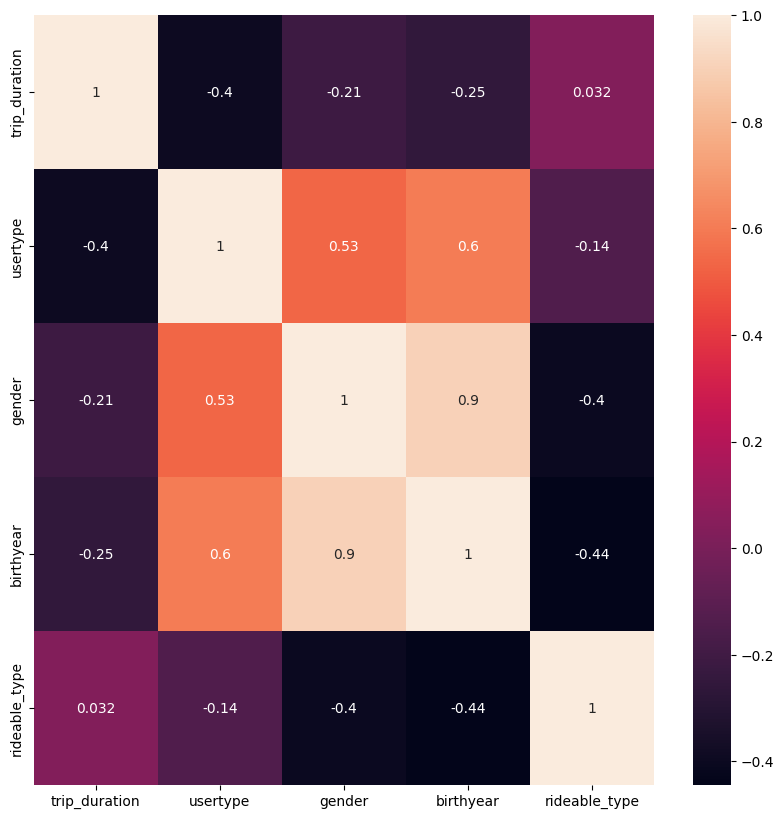

In [5]:
fig = plt.figure(figsize=(10, 10))
exclude = ['start_lat', 'end_lat', 'start_lng', 'end_lng', 'start_city', 'end_city', 'start_landmark', 'end_landmark', 
           'start_dpcapacity', 'end_dpcapacity'] + list(bike_df.columns)[23:]

sns.heatmap(bike_df.drop(exclude, axis=1).corr(numeric_only=True), annot=True)
plt.show()

There aren't any very strong correlations between the features with respect to trip_duration. 'gender' and 'usertype' are fairly correlated, and so are 'age' and 'usertype'. These variables are dependent on 'usertype' to exist, and just because a correlation exists, this does not mean that there is a relationship beyond that dependence.

A strong correlation exists between 'gender' and 'age', there may be a relationship here.

A mild correlation exists between 'rideable_type' and 'age', so we will investigate this as well.

There is also a small correlation between:

- 'trip_duration' and 'usertype', 

- 'trip_duration' and 'gender', 

- 'trip_duration' and 'age'.

## General Ride information

Trip duration is our only truly continuous variable, and as such it will be a crucial part of this analysis. Without trip duration, there would be no way to go in depth with our analysis, and no way to measure differences amongst our discrete classification variables such as usertype, gender, rideable type, start/end station, and age beyond simply comparing group ride counts.

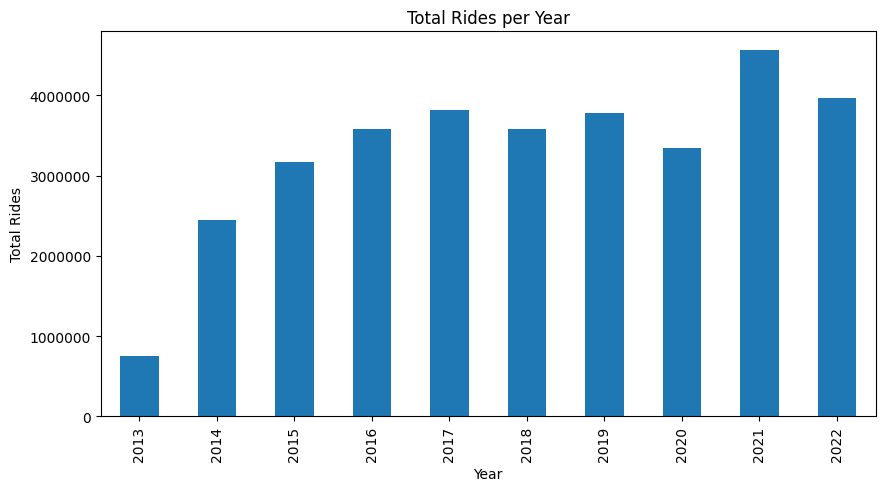

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year', 'trip_duration']
groups = ['st_year']

ax = bike_df[columns].groupby(groups)['trip_duration'].count().plot(ax=ax, kind='bar')

ax.set_xlabel('Year')
ax.set_ylabel('Total Rides')
ax.set_title('Total Rides per Year')

plt.ticklabel_format(style='plain', axis='y')
plt.show()

Our total rides took a dip in 2020, most likely due to covid, however they bounced back in 2021. It seems our total rides will dip in 2022 from where they were in 2021 as well, as there are only roughly two more months left in the year (data retrieved 11/8/2022).

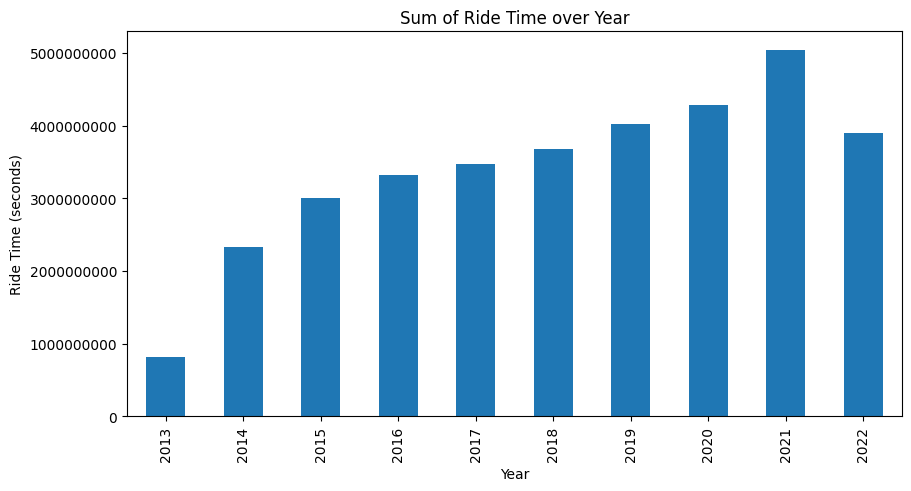

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year', 'trip_duration']
groups = ['st_year']

ax = bike_df[columns].groupby(groups)['trip_duration'].sum().plot(ax=ax, kind='bar')

ax.set_xlabel('Year')
ax.set_ylabel('Ride Time (seconds)')
ax.set_title('Sum of Ride Time over Year')

plt.ticklabel_format(style='plain', axis='y')
plt.show()

Our total ride time is down considerably from 2021 in 2022, and the data is current until 11/08/2022, so it seems that 2022 will be a decrease in total ride time as well as total ride count. 

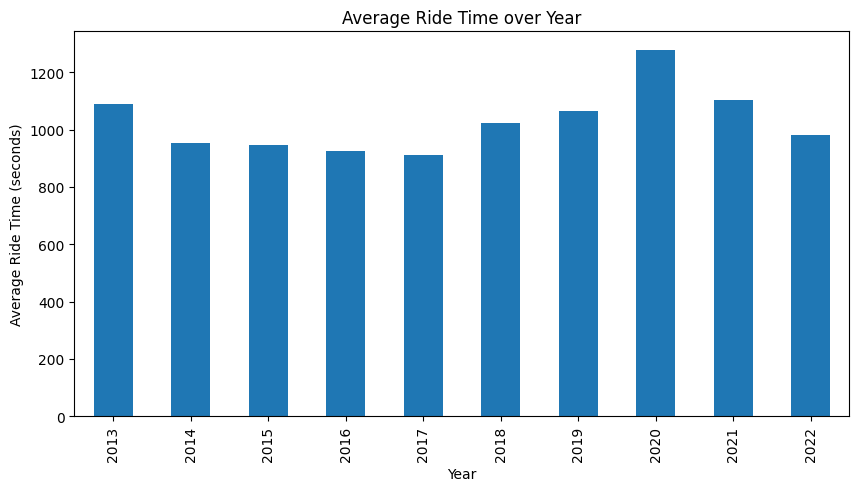

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year', 'trip_duration']
groups = ['st_year']

ax = bike_df[columns].groupby(groups)['trip_duration'].mean().plot(ax=ax, kind='bar')

ax.set_xlabel('Year')
ax.set_ylabel('Average Ride Time (seconds)')
ax.set_title('Average Ride Time over Year')

plt.ticklabel_format(style='plain', axis='y')
plt.show()

Our average ride time has a turbulent history. It reached its minimum in 2017, and its maximum in 2020. Interestingly, after reaching the peak, the Average Ride times are again on a descent. There are many potential reasons for this that may very well be hidden in our data.

Some include:
1. Casual/Member split changes
2. Rideable type changes such as introduction of electric powered bikes starting in 2020
3. Station introductions or popularity changes such as expansion into areas with larger average distances between stations

Changes in these factors could greatly influence a metric as simply and inclusive as ride count, total ride time, and average ride time. We have to keep this in mind moving forward in the analysis. To further dive into the way that ride time differs during specific days, months, and periods over the course of a year / a few years, we will move on to examine the casual/member
split over time.

## Gender

Now we will look at Gender and Age difference for members. I will not go into the same level of over-time detail on these two sections sections as I did with ride time on its own, because the categorical data does not exist past 2019.

In [9]:
# This is all gender values, regardless of usertype
bike_df['gender'].value_counts()

-1    16701232
 0    12218863
 1     4106291
Name: gender, dtype: int64

In [10]:
# This is gender values for members only; eliminating non-members because all
# non-members have missing gender data.
bike_df[['usertype', 'gender']].loc[bike_df['usertype'] == 1, 'gender'].value_counts()

 0    11933147
-1     6948329
 1     3927687
Name: gender, dtype: int64

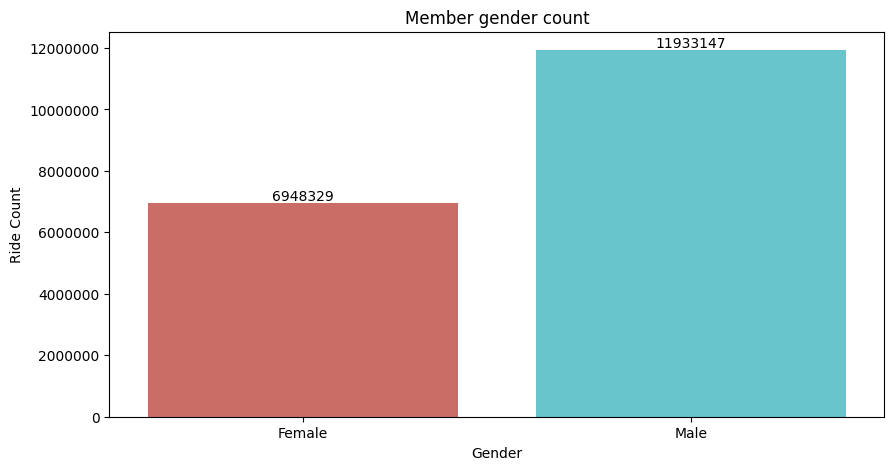

In [11]:
fig = plt.subplots(figsize=(10, 5))

columns = ['usertype', 'gender']
cond = (bike_df['usertype'] == 1) & (bike_df['gender'] != 1)

ax = sns.countplot(x=bike_df[columns].loc[cond]['gender'],
                   palette='hls')

ax.set_xlabel('Gender')
ax.set_ylabel('Ride Count')
ax.bar_label(ax.containers[0], fmt = '%d')
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Member gender count')
ax.set_xticklabels(['Female', 'Male'])

plt.show()

In [12]:
11933147 / (6948329)

1.7174124886717368

According to our data, men are 1.72x more likely to use our bike service than females. We also need to remain aware of the fact that there is a significant number of missing gender inputs from members. It is such a large amount of missing values that it is probably not possible to definitively reach conclusions based on this data alone, however I expect that the distribution would remain roughly the same if the unknown values were uncovered.

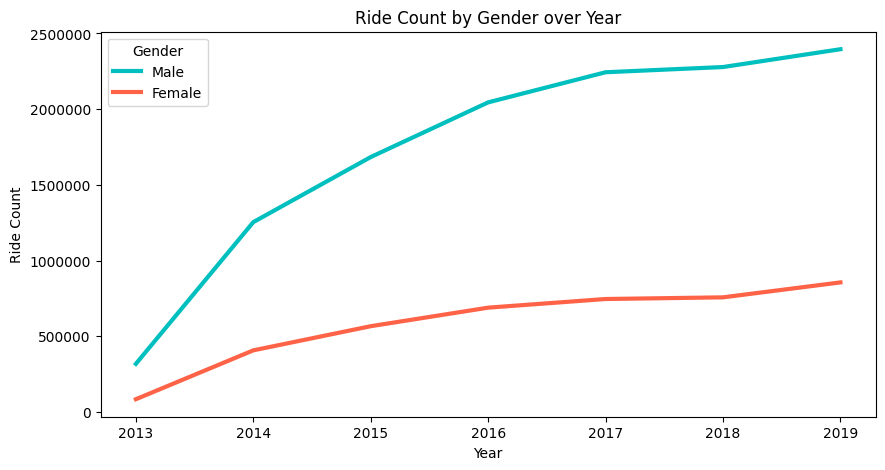

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year', 'gender', 'trip_duration']
groups = ['st_year', 'gender']
cond = (bike_df['gender'] != -1)

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, 
                                                                                       linewidth=3,
                                                                                       style={0:'c', 
                                                                                       1:'tomato'})

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Year')
ax.set_ylabel('Ride Count')
ax.set_title('Ride Count by Gender over Year')

plt.legend(title='Gender', loc='upper left', labels=['Male', 'Female'])
plt.show()

As you can see in the line graph above, the gap between count or number of rides attributed to male and female riders has expanded from 2013-2017 and seems to be maintaining/expanding from 2017 to 2019. This suggests that the gap still exists even in 2022 because there was no prior indication that it would have decreased based on our existing data.

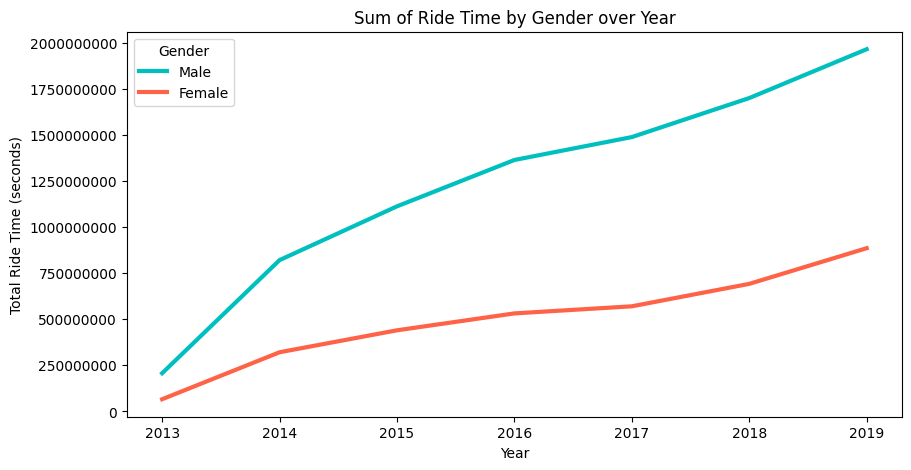

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year', 'gender', 'trip_duration']
groups = ['st_year', 'gender']
cond = (bike_df['gender'] != -1)

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].sum().unstack().plot(ax=ax, 
                                                                                       linewidth=3,
                                                                                       style={0:'c', 
                                                                                       1:'tomato'})

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Year')
ax.set_ylabel('Total Ride Time (seconds)')
ax.set_title('Sum of Ride Time by Gender over Year')

plt.legend(title='Gender', loc='upper left', labels=['Male', 'Female'])
plt.show()

Likewise the gap between the total ride-time based on gender has also increased historically untill around 2017 where it seems to begin to maintain.

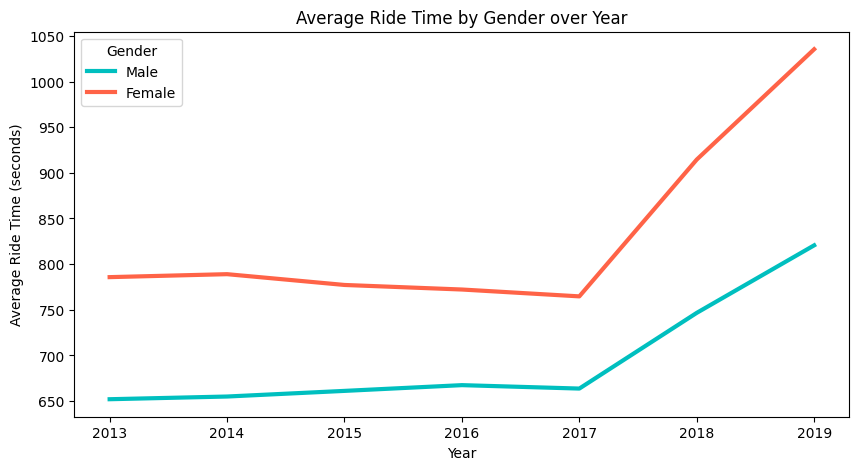

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year', 'gender', 'trip_duration']
groups = ['st_year', 'gender']
cond = (bike_df['gender'] != -1)

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, 
                                                                                       linewidth=3,
                                                                                       style={0:'c', 
                                                                                       1:'tomato'})

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Year')
ax.set_ylabel('Average Ride Time (seconds)')
ax.set_title('Average Ride Time by Gender over Year')

plt.legend(title='Gender', loc='upper left', labels=['Male', 'Female'])
plt.show()

Interestingly, our split in average time indicates that our Female riders actually spend more time on bike trips than their male counterparts. This could be down to minor preferences/tendencies, or it could be attributed to the types of stations that female riders utilize. For example, if certain stations are more popular with female riders than they are with male riders, perhaps these stations have inherently higher average commute times.

Keep in mind that our data represents only a portion of the members, as a significant amount (6954500) of member rides don't have listed gender information. This means that only ~70% of our member rides have gender data attributed to them, and 30% do not. If we had the data, it could skew our gender split, so we have to be cautious of drawing conclusions based on gender. I think it is fair to say that given the current split, the gender of our members is likely skewed towards male riders, but we cannot treat this educated guess as a concrete fact.

## Age

In [16]:
bike_df[['usertype', 'age']].loc[bike_df['usertype'] == 1, 'age'].value_counts()

-1     6948336
 27     913888
 28     908298
 29     886381
 26     865886
        ...   
 81         31
 93         15
 95          9
 90          5
 5           3
Name: age, Length: 89, dtype: int64

A problem here is that our age distributions are being distorted by all of the null values (age == -1) so these need to be removed to get a real picture of how the existing age values are distributed.

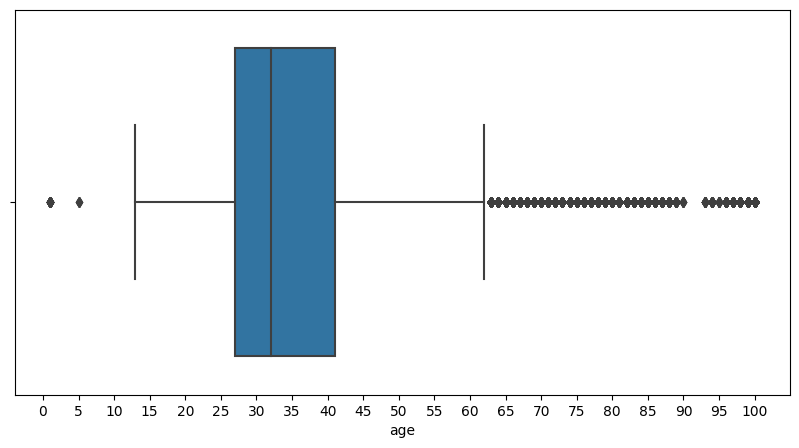

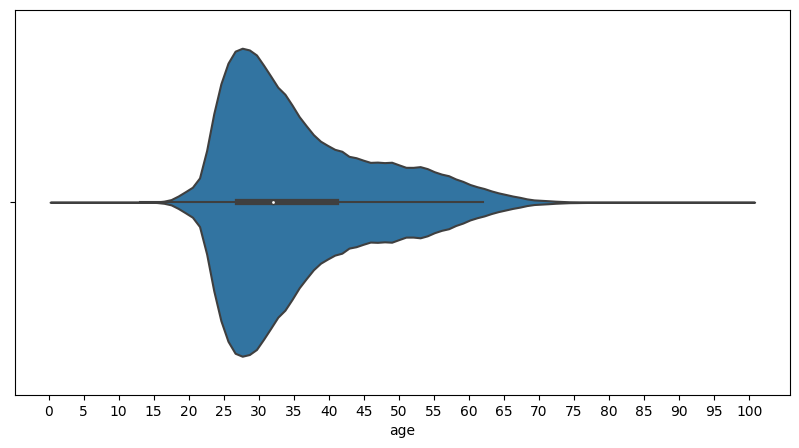

In [17]:
fig = plt.figure(figsize=(10, 5))

columns = ['usertype', 'age']
cond = (bike_df['age'] > 0) & (bike_df['usertype'] != 0)

ax = sns.boxplot(x=bike_df[columns].loc[cond]['age'])

ax.set_xticks(range(0, bike_df[bike_df['usertype'] == 1]['age'].max() + 1, 5))

plt.show()

fig = plt.figure(figsize=(10, 5))

columns = ['usertype', 'age']
cond = (bike_df['age'] > 0) & (bike_df['usertype'] != 0)

ax = sns.violinplot(x=bike_df[columns].loc[cond]['age'])

ax.set_xticks(range(0, bike_df[bike_df['usertype'] == 1]['age'].max() + 1, 5))

plt.show()

You can see above that our boxplot and violinplot show that the age distribution is heavily skewed towards younger people. It makes sense that younger people are more likely to be users who sign up for a membership, because younger people are more physically capable of utilizing their membership on a consistent basis, thus our bike service provides more value to them as a means of transportation.

In [18]:
bike_df.loc[(bike_df['age'] > 0) & (bike_df['usertype'] == 1)]['age'].describe()

count    1.586083e+07
mean     3.541492e+01
std      1.071213e+01
min      1.000000e+00
25%      2.700000e+01
50%      3.200000e+01
75%      4.100000e+01
max      1.000000e+02
Name: age, dtype: float64

As you can see above, our distribution greatly changes when we remove the null values from our members' age data. Our mean increased to ~35 years of age from ~24, our standard deviation decreased to ~11 years of age, and our mode changed from 0 to 27 years of age.

In [19]:
# Male mean age - Female mean age
(bike_df.loc[(bike_df['age'] > 0) & (bike_df['gender'] == 0)]['age'].mean() 
 - bike_df.loc[(bike_df['age'] > 0) & (bike_df['gender'] == 1)]['age'].mean())

1.901971085881847

The mean age of female riders is almost a full 2 years lower than the mean age of male riders, so there is probably a siginificant difference between the average age of a male rider and the average age of a female rider.

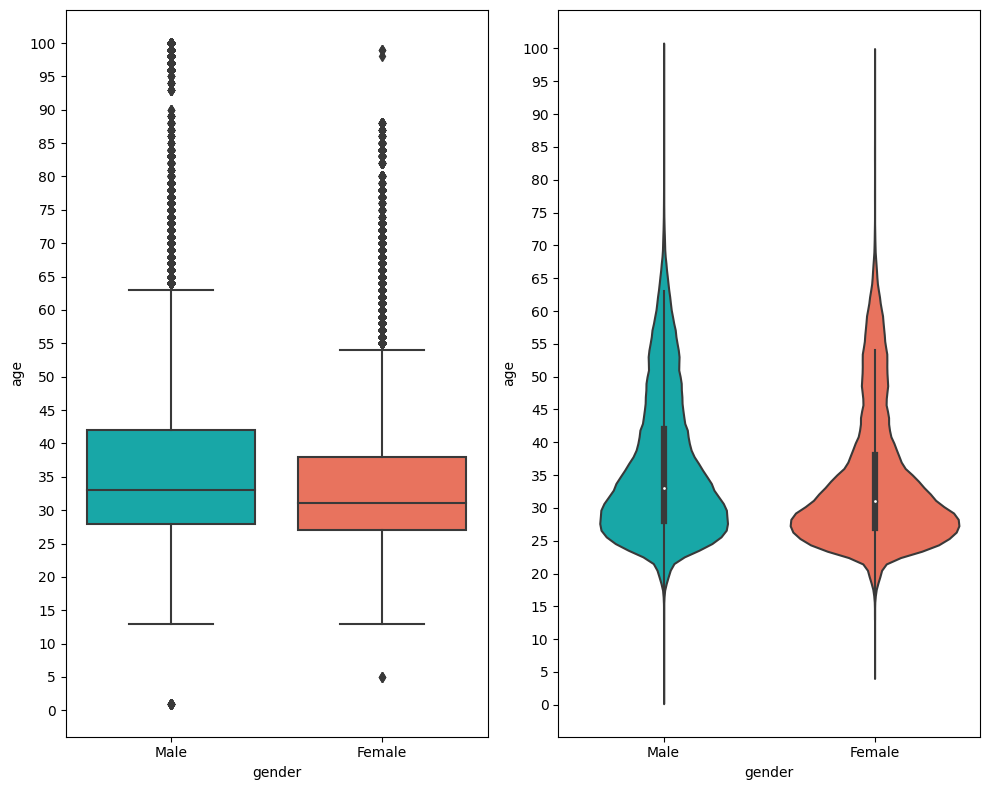

In [20]:
fig = plt.figure(figsize=(10, 8))
fig.add_subplot(1, 2, 1)

ag_1 = sns.boxplot(x=bike_df.loc[(bike_df['gender'] != -1) & (bike_df['usertype'] == 1)]['gender'],
                   y=bike_df.loc[(bike_df['age'] < 101) & (bike_df['age'] > 0) & (bike_df['usertype'] == 1)]['age'],
                   palette={0:'c', 1:'tomato'})

ag_1.set_yticks(range(0, 101, 5))
ag_1.set_xticklabels(['Male', 'Female'])

fig.add_subplot(1, 2, 2)

ag_2 = sns.violinplot(x=bike_df.loc[(bike_df['gender'] != -1) & (bike_df['usertype'] == 1)]['gender'],
                      y=bike_df.loc[(bike_df['age'] < 101) & (bike_df['age'] > 0) & (bike_df['usertype'] == 1)]['age'],
                      palette={0:'c', 1:'tomato'})

ag_2.set_yticks(range(0, 101, 5))
ag_2.set_xticklabels(['Male', 'Female'])

plt.tight_layout()
plt.show()

Female and male have different medians, and male's distribution is not as tight as female's distribution. Specifically, the inter quartile range as well as the upper varies more for men than for women.

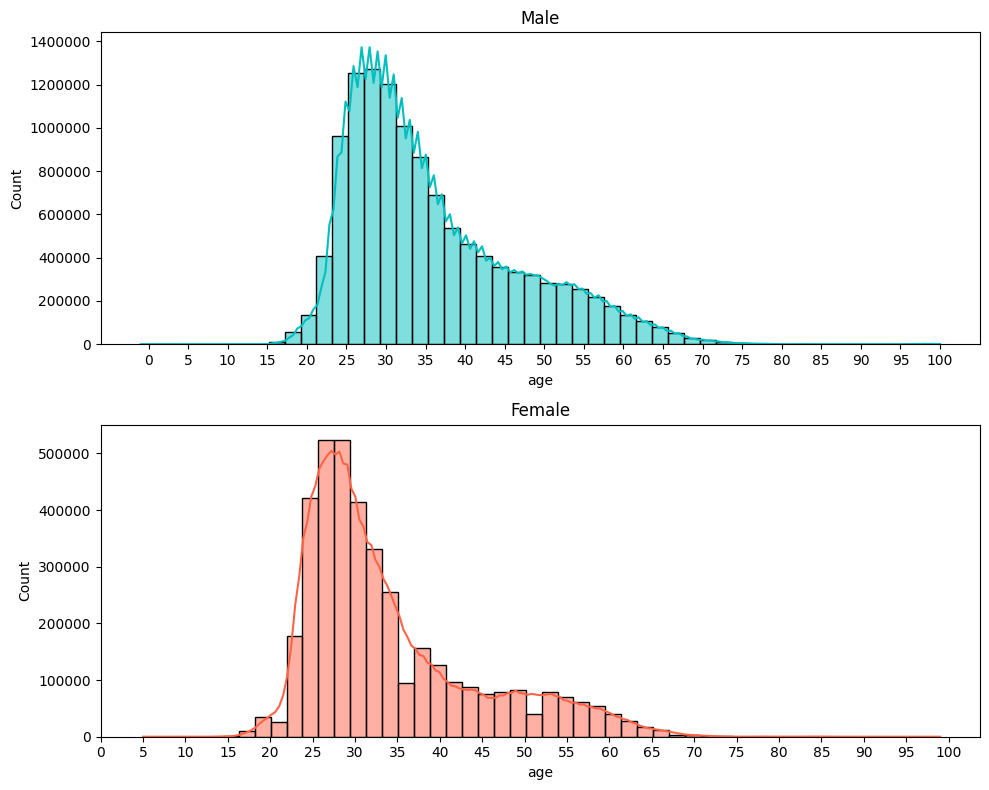

In [21]:
fig = plt.figure(figsize=(10, 8))
fig.add_subplot(2, 1, 1)

subset=['gender','usertype','age']

conditions = (bike_df[subset]['gender'] == 0) & (bike_df[subset]['usertype'] == 1)

ax_1 = sns.histplot(x=bike_df[subset].loc[conditions]['age'],
                    bins=50,
                    color='c',
                    kde=True)

ax_1.set(title='Male')
ax_1.ticklabel_format(style='plain', axis='y')
ax_1.set_xticks(range(0, 101, 5))

fig.add_subplot(2, 1, 2)

conditions2 = (bike_df[subset]['gender'] == 1) & (bike_df[subset]['usertype'] == 1)

ax_2 = sns.histplot(x=bike_df[subset].loc[conditions2]['age'], 
                    bins=50, 
                    color='tomato',
                    kde=True)

ax_2.set(title='Female')
ax_2.ticklabel_format(style='plain', axis='y')
ax_2.set_xticks(range(0, 101, 5))

plt.tight_layout()
plt.show()

We can examine how this has changed over the years as well. I will utilize Quartiles because grouping will allow us to figure out general differences amongst age groups that are relevant due to their representation in the data. We will also be able to avoid having so many different age lines on our graphs that it obfuscates the point of examining change over time in the first place.

In [22]:
bike_df[['usertype','age']].loc[(bike_df['usertype'] != 0) & (bike_df['age'] > 0)]['age'].describe()

count    1.586083e+07
mean     3.541492e+01
std      1.071213e+01
min      1.000000e+00
25%      2.700000e+01
50%      3.200000e+01
75%      4.100000e+01
max      1.000000e+02
Name: age, dtype: float64

We will use these (min, 25%, 50%, 75%, max) values as the range for our bins, and we will use this format for ranges:

[min, 25%), [25%, median), [median, 75%), [75%, max + 1)

Legend:
- Q0 means from and including min to but not including 25%
- Q1 means from and including 25% to but not including 50%
- Q2 means from and including 50% to but not including 75%
- Q3 means from and including 75% to but not including 100%

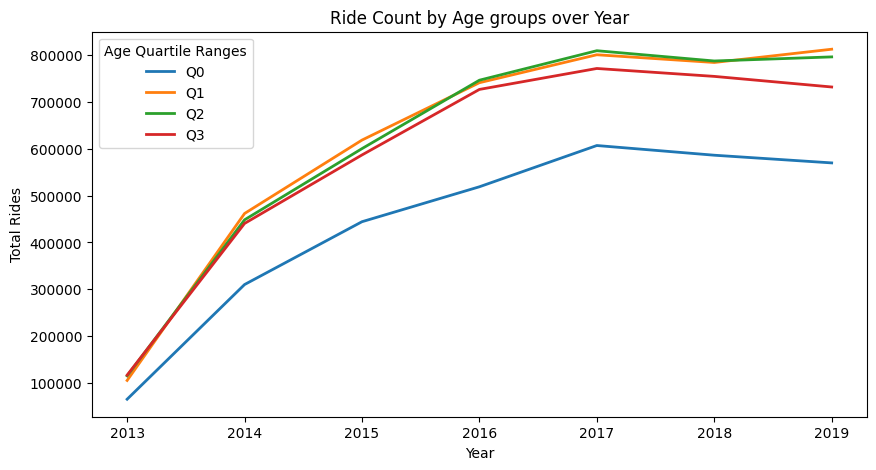

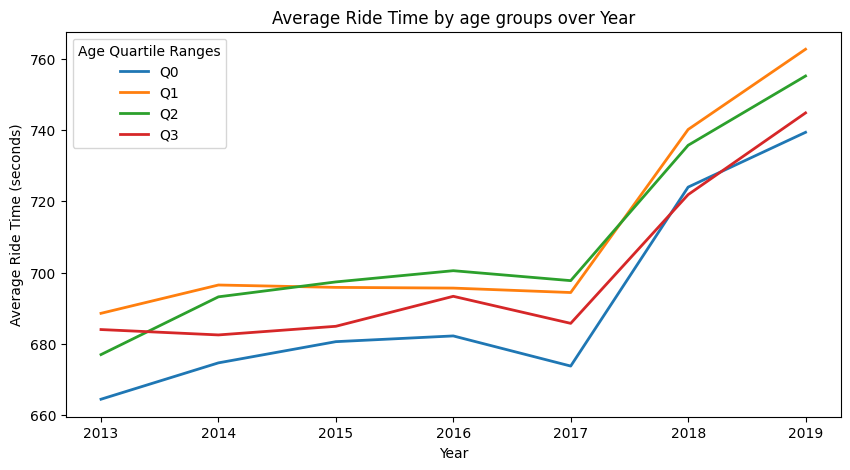

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['age', 'start_date', 'usertype', 'trip_duration']
bins = [1, 27, 32, 41, 101]
groups = [bike_df.loc[bike_df['age'] > 0]['start_date'].dt.year, 
          pd.cut(bike_df.loc[bike_df['age'] > 0].age, bins=bins, right=False)]
cond = (bike_df['usertype'] != 0)

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=2)

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Year')
ax.set_ylabel('Total Rides')
ax.set_title('Ride Count by Age groups over Year')

plt.legend(title='Age Quartile Ranges', labels=['Q0', 'Q1', 'Q2', 'Q3'])
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

columns = ['age', 'start_date', 'usertype', 'trip_duration']
bins = [1, 27, 32, 41, 101]
groups = [bike_df.loc[bike_df['age'] > 0]['start_date'].dt.year, 
          pd.cut(bike_df.loc[bike_df['age'] > 0].age, bins=bins, right=False)]
cond = (bike_df['usertype'] != 0)

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=2)

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Year')
ax.set_ylabel('Average Ride Time (seconds)')
ax.set_title('Average Ride Time by age groups over Year')

plt.legend(title='Age Quartile Ranges', labels=['Q0', 'Q1', 'Q2', 'Q3'])
plt.show()

One interesting aspect of our data is that the average ridetime is increasing for every quartile, so for all age ranges it seems that our average ride time is increasing. Why has this happened?

Through online research, it seems that Divvy experienced a downturn in 2016 followed by a major uptick in 2017 due to its station expansions. In 2016, our network expanded into "less densely populated areas in South and West Chicago, outside of densely populated affluent downtown and northside neighborhoods". In 2017, advertising and promotions helped to bring customers in to the system from these new stations, and this rise in average ride time is the result of said new stations being more spread out than our bike network was prior to the 2016 network expansion.

https://chicagoreader.com/columns-opinion/after-a-2016-slump-divvy-turned-a-record-profit-in-2017/

I will venture a guess that the areas that Divvy saw their major turn around in have different demographics from the more affluent Northern areas: more young people. I am guessing this because the average ride time for our Q0 (Ages below 27) shot from the lowest in 2017 to the highest in 2018. This is despite the ride count marginally increasing. I believe that their rides take longer because the majority of the new under 27 riders in 2017 and onward came from the newer areas.

If this trend has continued on into 2022, it means that we should target this group of users in our South and West Chicago station for membership conversion from casual riders, because they tend to use the service for much longer amounts of time. This would be doubly beneficial if we can encourage the use of charge by the minute electric bikes instead of classic man-powered bikes.

## Rideable Type

Unfortunately in the documentation provided by Divvy through the online data download files, this variable is not clearly explained, and no matter where I look, I haven't been able to find a conclusive answer. It seems that the two categories of rideable type are

Classic bike - non-ebike

Docked bike - older ebike.

Electric bike - newer ebikes.

However, it is never clarified, and this causes a major discrepancy when trying to measure the potential impact that rideable type has on our data. In addition to this, keeping docked bike seperate from classic bike results in a major discrepancy when graphic the change in utilization of the bike types starting in 2020 when electric bikes are first introduced. This leads me to believe that docked bikes are actually classic bikes, however they are

In [24]:
bike_df['rideable_type'].unique()

array([0, 1, 2], dtype=int8)

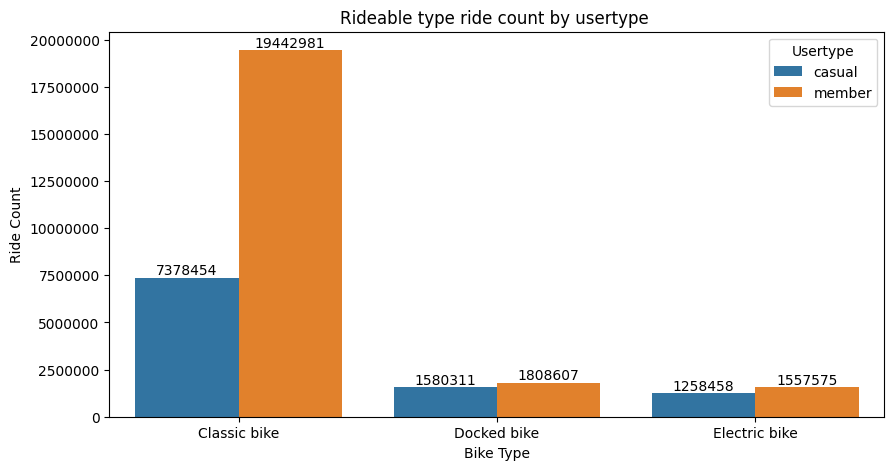

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['usertype', 'rideable_type']

# This plot is a countplot of the above values
ax = sns.countplot(x='rideable_type',
                   data=bike_df[columns],
                   hue='usertype',
                   palette={0:'tab:blue', 1:'tab:orange'})

ax.bar_label(ax.containers[0], fmt = '%d')
ax.bar_label(ax.containers[1], fmt = '%d')
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Rideable type ride count by usertype ')
ax.set_xticklabels(['Classic bike', 'Docked bike', 'Electric bike'])
ax.set_xlabel('Bike Type')
ax.set_ylabel('Ride Count')

plt.legend(title='Usertype', labels=['casual', 'member'])
plt.show()

It seems like the popularity of electric bikes is far outweighed by the popularity of classic/docked bikes. This makes some sense, because classic bikes have been available for a much longer time than electric bikes.

Electric bikes were introduced in 2020, so we have to examine how this changes over time to get an accurate picture of current rideable type preferences.

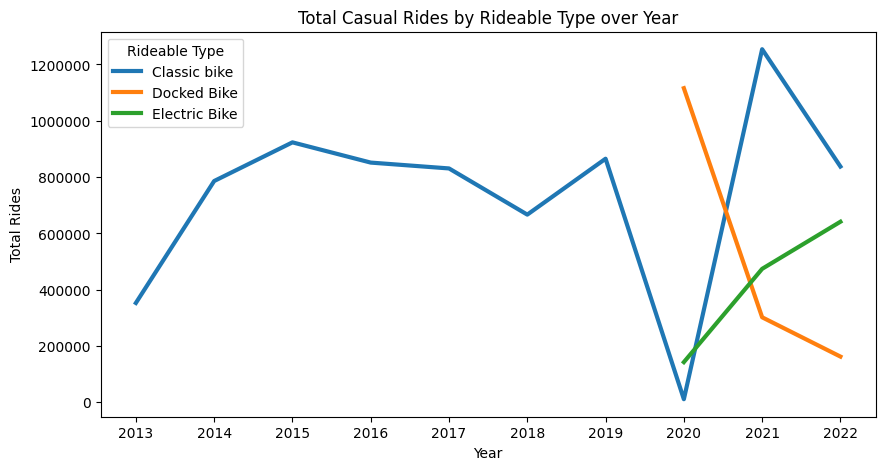

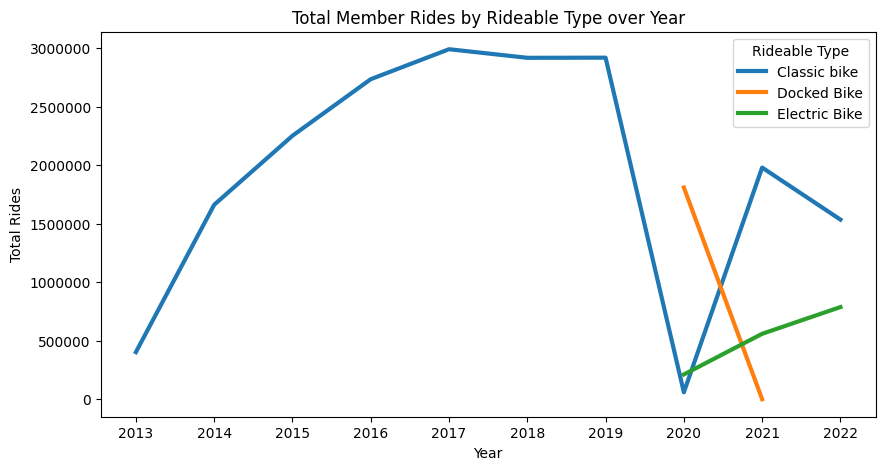

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year','rideable_type','trip_duration']
groups = ['st_year', bike_df['rideable_type']]
cond = (bike_df['usertype'] == 0)

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_year'].unique()))
ax.ticklabel_format(style='plain')
ax.set_xlabel('Year')
ax.set_ylabel('Total Rides')
ax.set_title('Total Casual Rides by Rideable Type over Year')

plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])

plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year','rideable_type','trip_duration']
groups = ['st_year', bike_df['rideable_type']]
cond = (bike_df['usertype'] == 1)

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_year'].unique()))
ax.ticklabel_format(style='plain')
ax.set_xlabel('Year')
ax.set_ylabel('Total Rides')
ax.set_title('Total Member Rides by Rideable Type over Year')

plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])

plt.show()

As you can see above, generally speaking, Electric bikes are begining to replace Classic bikes by ride count for both groups. They are replacing casual classic bike casual rides at a faster rate than classic bike member rides.

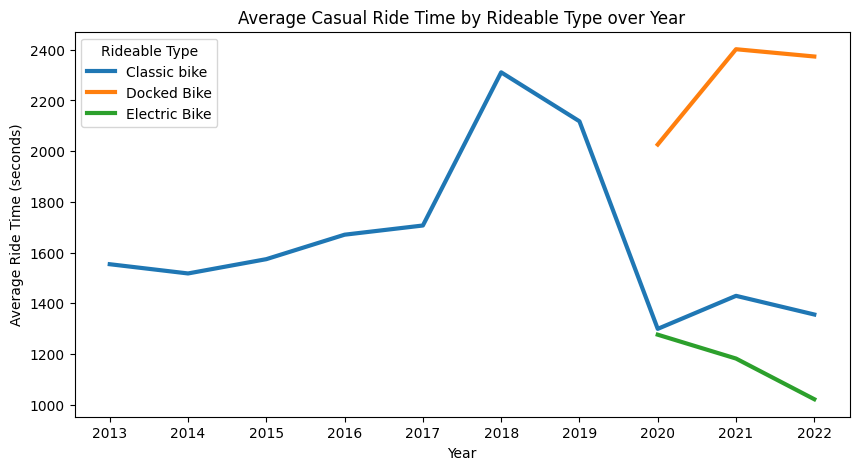

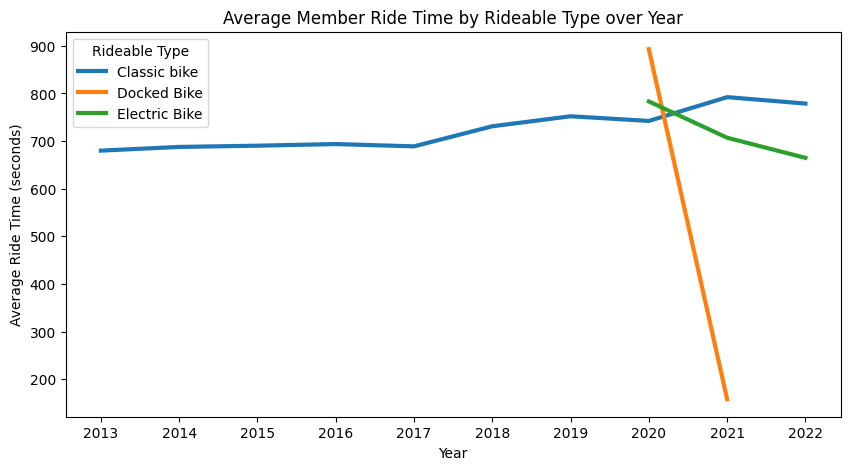

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year','rideable_type','trip_duration']
groups = ['st_year', bike_df['rideable_type']]
cond = (bike_df['usertype'] == 0)

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_year'].unique()))
ax.ticklabel_format(style='plain')
ax.set_xlabel('Year')
ax.set_ylabel('Average Ride Time (seconds)')
ax.set_title('Average Casual Ride Time by Rideable Type over Year')

plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])
plt.show()


fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year','rideable_type','trip_duration']
groups = ['st_year', bike_df['rideable_type']]
cond = (bike_df['usertype'] == 1)

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_year'].unique()))
ax.ticklabel_format(style='plain')
ax.set_xlabel('Year')
ax.set_ylabel('Average Ride Time (seconds)')
ax.set_title('Average Member Ride Time by Rideable Type over Year')

plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])
plt.show()

## Trip Duration: Member vs Casual rides

This is the focal point of this analysis project. We want to understand what differentiates a member from a casual rider in terms of their habits and the characteristics of their rides to gain insights into how to target casual riders for membership conversion. To do this, we have to develop a comprehensive understanding of how trip duration changes based on categorical differences.

In [28]:
bike_df['usertype'].value_counts()

1    22809163
0    10217223
Name: usertype, dtype: int64

In [29]:
22809163/(22809163 + 10217223)

0.6906345429378801

We have 22809163 member rides and 10217223 non member rides in our bike system. 69% of the rides in our system are member holder rides. How are these rides distributed?

### Kernel Density Estimate

In [30]:
bike_df[['trip_duration', 'usertype']].loc[(bike_df['usertype'] == 0), 'trip_duration'].mean()

1675.6393351696445

In [31]:
bike_df[['trip_duration', 'usertype']].loc[(bike_df['usertype'] == 1), 'trip_duration'].mean()

734.7154991614555

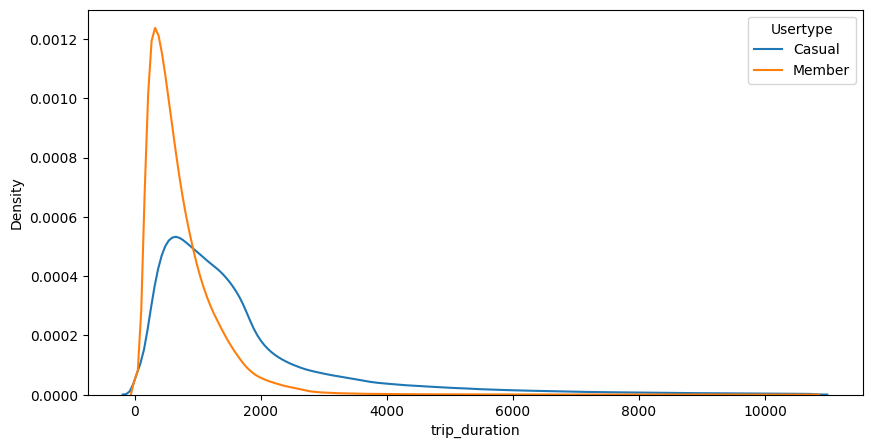

In [32]:
fig, axes = plt.subplots(figsize=(10, 5), ncols=1, nrows=1)

columns = ['trip_duration', 'usertype']

sns.kdeplot(data=bike_df[columns].loc[(bike_df['usertype'] == 0)], x='trip_duration')
sns.kdeplot(data=bike_df[columns].loc[(bike_df['usertype'] == 1)], x='trip_duration')

ax.set_xlabel('Trip Duration (seconds)')

plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])
plt.show()

The above kernel density estimate plots are independent of one another. This means that our Usertype: 'Member' has an area under the curve that would equate to 100% of Member bike rides only. Likewise, our Usertype: 'Casual' has an area under the curve that would equate to 100% of casual rides but only.

If I was to use seaborn's hue='' function, it would weight both Usertype distributions against the overall distribution of trip_duration. This would mean that Member's area under the curve would account for 100% of the member rides, however it would be weighted by the probability of member rides occuring (which is about 70%). We are only using this plot to highlight characteristics of our distributions, not to evaluate the overall distribution, so using hue serves no purpose.

Our density plot reveals the staggering difference in the concentration of both distributions. Our Member ride times are much more concentrated than casual ride times, which have much more variation comparatively.

This makes sense, we expect our Members to make repeat trips as a means of transportation rather than novel trips, which results in more concentrated distribution of ride times. Inversely, we expect that our casual riders are much more likely to utilize our ride service for leisure/tourist activities, so the increased variation in contrast with member rides makes sense.

This means that we may want to target our advertising to casual riders with ride times that align more with the average member ride time over the course of a given route.

### Trip Duration Over time

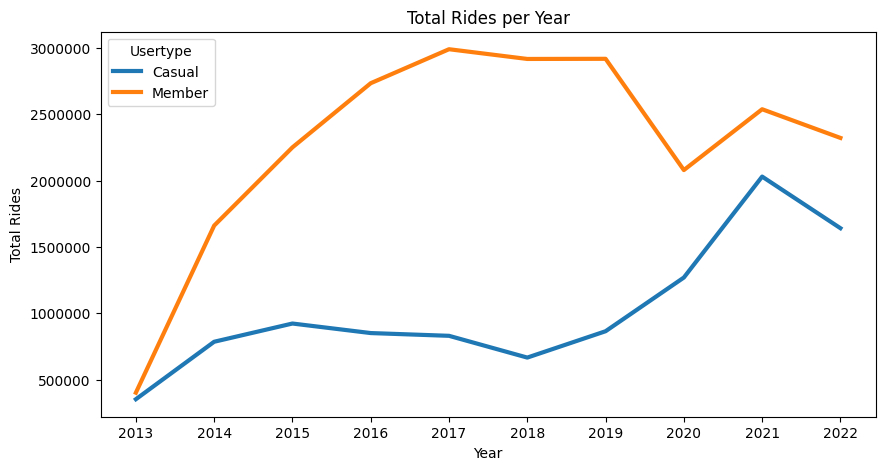

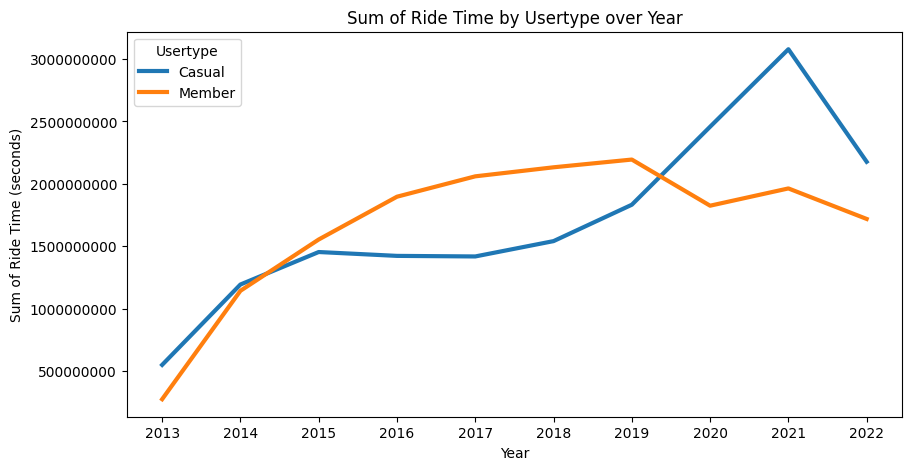

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_month', 'st_year', 'usertype', 'trip_duration']
groups = ['st_year', 'usertype']

ax = bike_df[columns].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_year'].unique()))
ax.ticklabel_format(style='plain')
ax.set_xlabel('Year')
ax.set_ylabel('Total Rides')
ax.set_title(f'Total Rides per Year')

plt.legend(title='Usertype', loc='upper left', labels=['Casual', 'Member'])
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_month', 'st_year', 'usertype', 'trip_duration']
groups = ['st_year', 'usertype']

ax = bike_df[columns].groupby(groups)['trip_duration'].sum().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_year'].unique()))
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Year')
ax.set_ylabel('Sum of Ride Time (seconds)')
ax.set_title('Sum of Ride Time by Usertype over Year')

plt.legend(title='Usertype', loc='upper left', labels=['Casual', 'Member'])
plt.show()

As you can see above, our graph of each individual year over time shows that there is relatively similar behaviour with respect to the total number of rides over time of our bike rental system excluding 2013 (when our system was first put into place).

Our Member-Casual split ride count gap expanded, and then constricted greatly over the course of 2019-2021.

Member rides have historically have comprised the vast majority of the total rides year over year, however as of 2019 the gap between the two usertypes began shrinking with respect to the total number of rides. This is interesting.

Possible Reasons:
1. COVID19 caused many to stay inside; canceling memberships in favor of taking one-off rides and never resubscribing.
2. Expansion in tourist rider favoured stations
3. Increases in pricing could be impacting network as well

With respect to 2020-present, I would wager that our network is probably still recovering from COVID19. Also, with respect to 2022 seemingly having stagnant ride time and total number of ride numbers (as our data represents all but about 2 months of data), there are existing articles that seem to indicate that recent pricing changes may have priced some prospective bike riders out of the market.

Articles:
- https://blockclubchicago.org/2022/06/10/divvys-new-e-bike-fees-pricing-out-some-riders-users-say/

- https://chi.streetsblog.org/2022/06/14/divvys-new-pricing-is-unaffordable-to-many-residents-and-therefore-inequitable/

It seems that Divvy's choices also include expansions with bike stations that only accommodate e-bikes and not classic bikes, so this forces members to use potentially more expensive bike options in exchange for convienience rather than having access to the classic bikes that were previously free to ride for members.

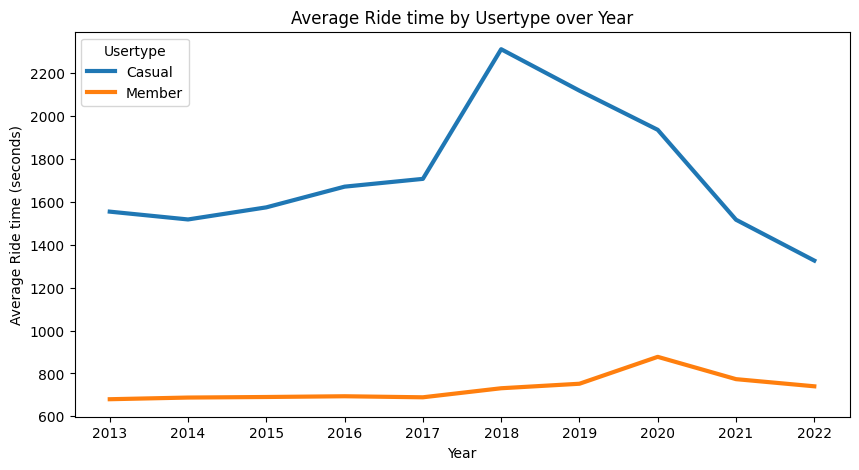

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_month', 'st_year', 'usertype', 'trip_duration']
groups = ['st_year', 'usertype']

ax = bike_df[columns].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_year'].unique()))
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Year')
ax.set_ylabel('Average Ride time (seconds)')
ax.set_title('Average Ride time by Usertype over Year')

plt.legend(title='Usertype', loc='upper left', labels=['Casual', 'Member'])
plt.show()

It seems that a potentially strong predictor for Member status is our Average Ride time, however this is misconception. Why? Because Members and Casual riders probably don't use the same stations in the same ways or at the same rates. 

What this means is that the difference in average ride times between Members and Casual riders could potentially be fully attributed to the station and the difference in habits of Members vs Casual riders to and from said station.

I still believe that we will on average see casual riders taking longer to go on the same route from one station to another due to the fact that the trip is a novel trip as opposed to a member who takes the ride (for example) repeatedly and learns the shortest route/isn't stopping to sightsee.

### Trip duration over the years; Casual vs Member riders

In [35]:
# Setting up labels.

sum_tot = 0
new_l = []
new_l_basic = []

years = list(bike_df['st_year'].unique())

month_ct = 0

for i, year in enumerate(years):
    months = list(bike_df.loc[bike_df['st_year'] == year, 'st_month'].unique())
    day_ct = 0
    
    for k, month in enumerate(months):

        if (i == 0 and k == 0) or (year == years[-1] and month == months[-1]):
            new_l_basic.append(f'{month}/{year}')
        elif month == 1:
            new_l_basic.append(f'{month}/{year}')
        else:
            new_l_basic.append('')
        
        
        
        days = list(bike_df.loc[(bike_df['st_year'] == year) & (bike_df['st_month'] == month), 'st_day'].unique())
        for j, day in enumerate(days):
            
            if (i == 0 and k == 0 and j == 0) or (year == years[-1] and month == months[-1] and day == days[-1]):
                new_l.append(f'{month}/{day}/{year}')
            elif month == 1 and day == 1:
                new_l.append(f'{month}/{day}/{year}')
            else:
                new_l.append('')    
    
# With day labels
new_x_ticks = []
new_labels = []

for i, tick in enumerate(new_l):
    if tick != '':
        new_x_ticks.append(i)
        new_labels.append(tick)
        
# Without day labels
new_x_ticks_basic = []
new_labels_basic = []

for i, label in enumerate(new_l_basic):
    if label != '':
        new_x_ticks_basic.append(i)
        new_labels_basic.append(label)

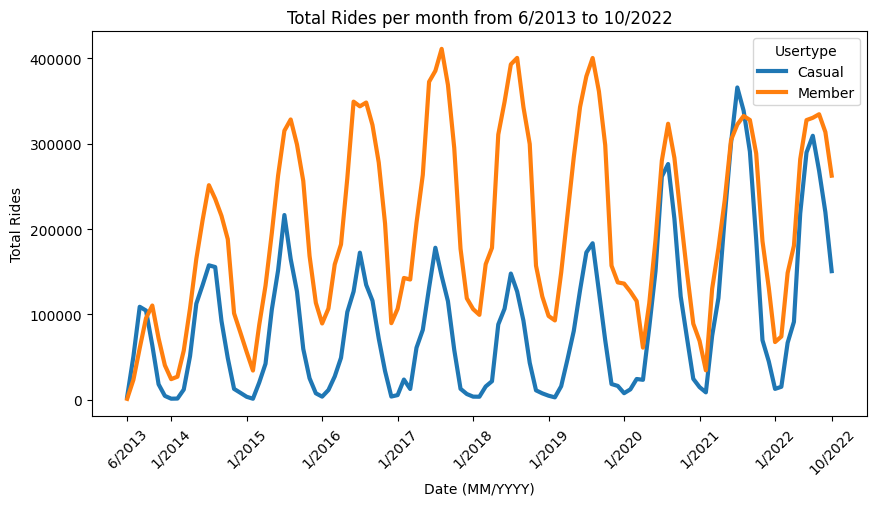

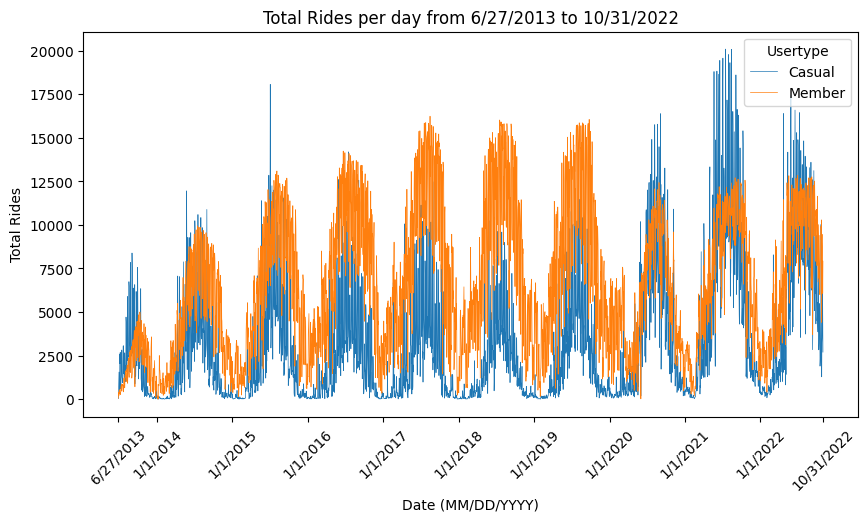

In [36]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year', 'st_month', 'usertype', 'trip_duration']
groups = ['st_year', 'st_month', 'usertype']

ax = bike_df[columns].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(new_x_ticks_basic)
ax.set_xticklabels(new_labels_basic)

ax.set_xlabel('Date (MM/YYYY)')
ax.set_ylabel('Total Rides')
ax.set_title(f'Total Rides per month from {new_labels_basic[0]} to {new_labels_basic[-1]}')

plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])
plt.xticks(rotation=45)
plt.show()


fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_day', 'st_year', 'st_month', 'usertype', 'trip_duration']
groups = ['st_year', 'st_month', 'st_day', 'usertype']

ax = bike_df[columns].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=0.5)

ax.set_xticks(new_x_ticks)
ax.set_xticklabels(new_labels)

ax.set_xlabel('Date (MM/DD/YYYY)')
ax.set_ylabel('Total Rides')
ax.set_title(f'Total Rides per day from {new_labels[0]} to {new_labels[-1]}')


plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])
plt.xticks(rotation=45)
plt.show()

As you can see above, there is a clear pattern by which total rides peak during a consistent time of the year. You can also see that including the individual day's data as the lowest tier of aggregation rather than the month reveals the immense amount of daily variablity over the course of a month for both usertypes.

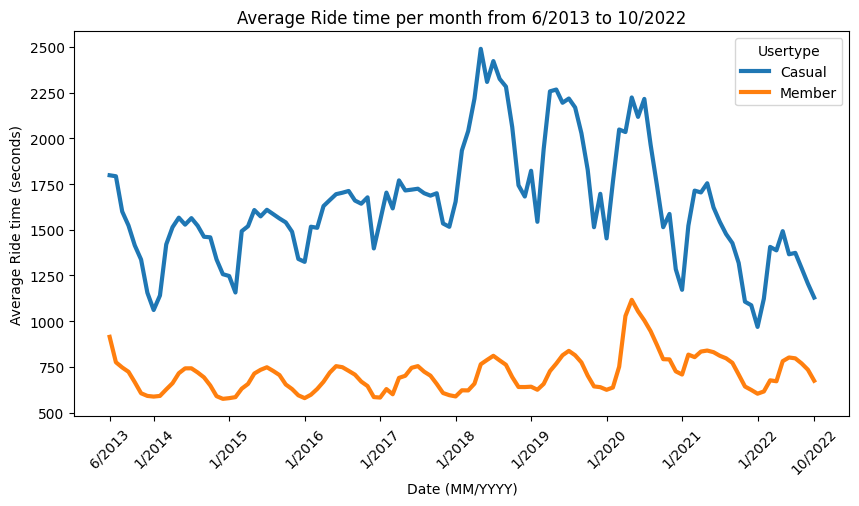

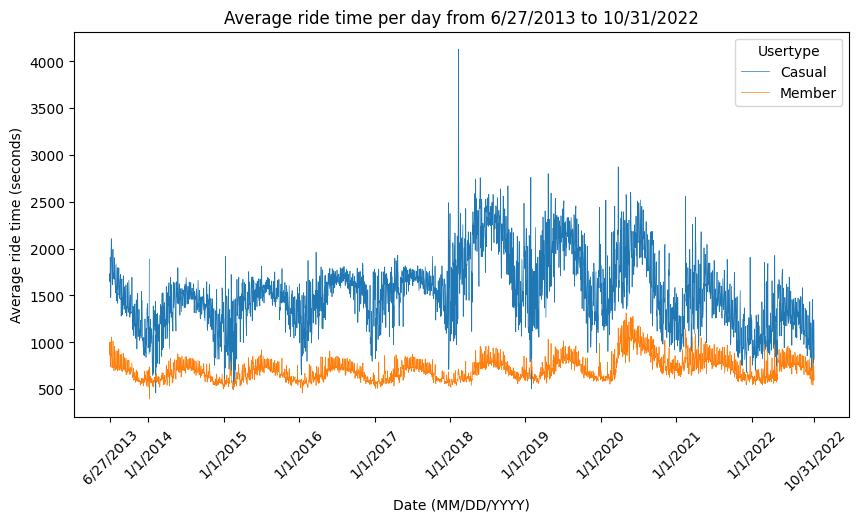

In [37]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_year', 'st_month', 'usertype', 'trip_duration']
groups = ['st_year', 'st_month', 'usertype']

ax = bike_df[columns].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(new_x_ticks_basic)
ax.set_xticklabels(new_labels_basic)

ax.set_xlabel('Date (MM/YYYY)')
ax.set_ylabel('Average Ride time (seconds)')
ax.set_title(f'Average Ride time per month from {new_labels_basic[0]} to {new_labels_basic[-1]}')

plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])
plt.xticks(rotation=45)
plt.show()


fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_day', 'st_year', 'st_month', 'usertype', 'trip_duration']
groups = ['st_year', 'st_month', 'st_day', 'usertype']

ax = bike_df[columns].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=0.5)

ax.set_xticks(new_x_ticks)
ax.set_xticklabels(new_labels)

ax.set_xlabel('Date (MM/DD/YYYY)')
ax.set_ylabel('Average ride time (seconds)')
ax.set_title(f'Average ride time per day from {new_labels[0]} to {new_labels[-1]}')

plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])
plt.xticks(rotation=45)
plt.show()

A deeper examination of Average ride time reveals that there is a consistent average ride time peak during the middle of the year for both casual and member riders. This is probably due to the weather, as during warmer months people spend more time on their rides.

The increased variabliity for average ride time when aggregating by day as opposed to by month is also telling. That is, it seems as if Member ride time varies less based on the respective day than Casual user ride time. This greater amount of variablity of casual rides than member rides is also somewhat noticeable in the Total ride time per day charts.

The deeper we drill into our data through higher bin (more precise time buckets) aggregating, the less of a picture of a general trend we get, and more the peculiarities of the data. For example, aggregating by year shows us the way that total or average ride time changed overall through the year, while showing us by month allows us to examine cyclical behaviour and pick up on potential seasonality. Aggregating by day allows us to gain insight into how the data varies over the course of those respective months; if we were to aggregate by hour, it would probably vary even more.

### Breaking down trip_duration behavior aggregating to Weekdays
What day/week/month tends to be the busiest each year? Does this change over time? Why?

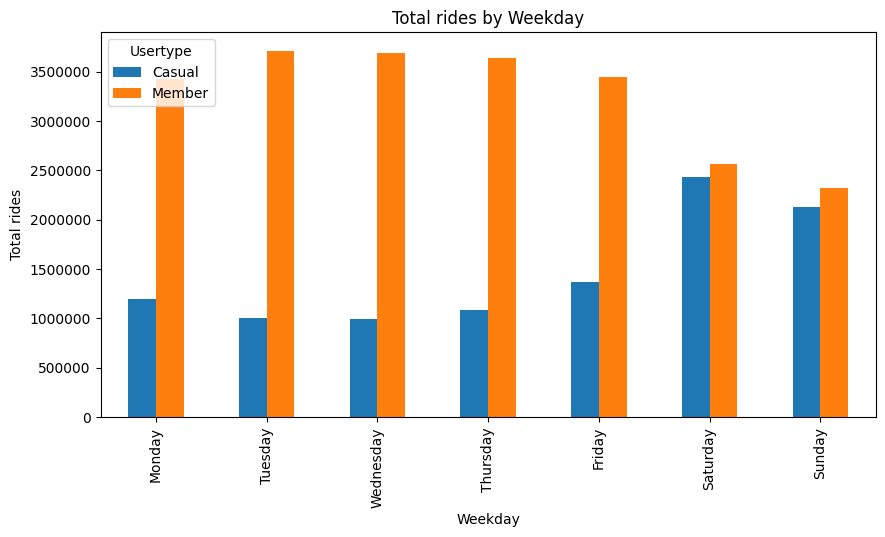

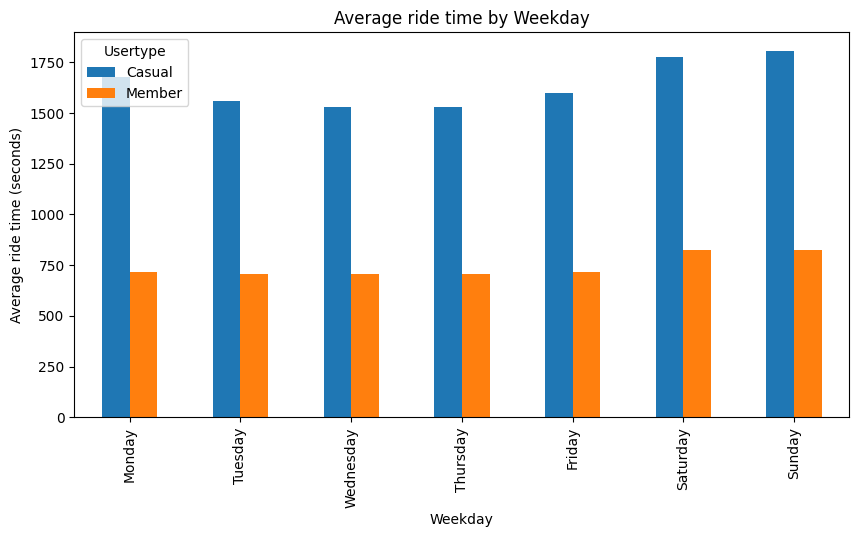

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_day_name', 'usertype', 'trip_duration']
groups = ['st_day_name', 'usertype']

week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = bike_df[columns].groupby(groups)['trip_duration'].count().unstack().reindex(week).plot(ax=ax, kind='bar')

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Weekday')
ax.set_ylabel('Total rides')
ax.set_title('Total rides by Weekday')

plt.legend(title='Usertype', loc='upper left', labels=['Casual', 'Member'])
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_day_name', 'usertype', 'trip_duration']
groups = ['st_day_name', 'usertype']

week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = bike_df[columns].groupby(groups)['trip_duration'].mean().unstack().reindex(week).plot(ax=ax, kind='bar')

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Weekday')
ax.set_ylabel('Average ride time (seconds)')
ax.set_title('Average ride time by Weekday')

plt.legend(title='Usertype', loc='upper left', labels=['Casual', 'Member'])
plt.show()

It seems there is a divide between weekends and week days, so I will split the data and aggregate by hour to figure out the peak operating hours across our station network. 

### Peak Hours for Weekdays vs Weekends

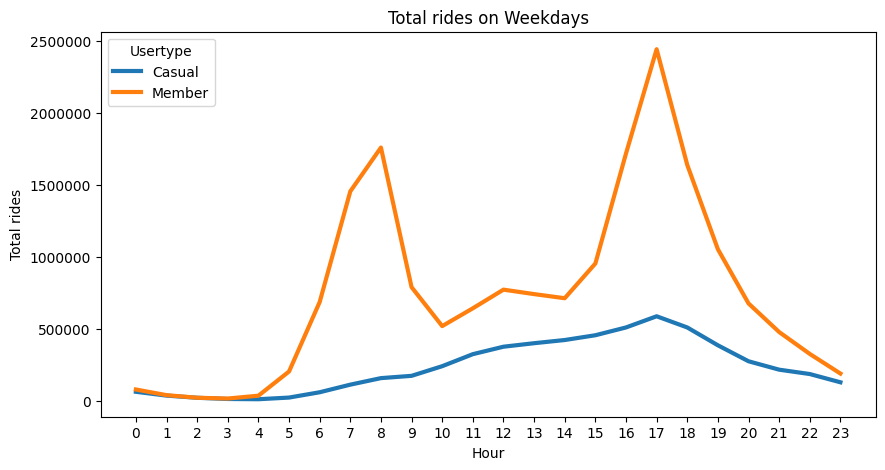

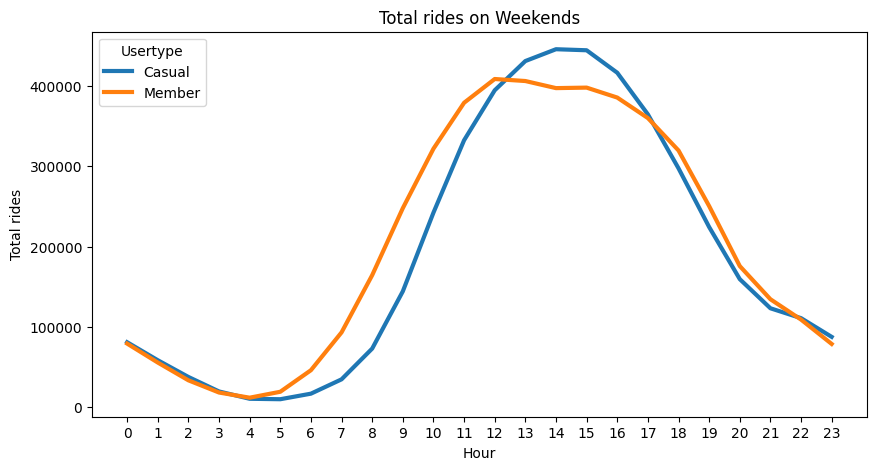

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_hour', 'usertype', 'trip_duration']
groups = ['st_hour', 'usertype']

week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
cond = (bike_df['st_day_name'].isin(week))

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_hour'].unique()))
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Hour')
ax.set_ylabel('Total rides')
ax.set_title('Total rides on Weekdays')

plt.legend(title='Usertype', loc='upper left', labels=['Casual', 'Member'])
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

weekend = ['Saturday', 'Sunday']
cond = (bike_df['st_day_name'].isin(weekend))

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_hour'].unique()))
ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Hour')
ax.set_ylabel('Total rides')
ax.set_title('Total rides on Weekends')

plt.legend(title='Usertype', loc='upper left', labels=['Casual', 'Member'])
plt.show()

Weekday peak hours:


Member: 7am - 8am, 4pm - 6pm

Casual: 4pm - 6pm


Weekend peak hours:


Member: 11am - 4pm

Casual: 12pm - 4pm


Interestingly enough, on weekdays there is a distinct difference in the behaviour of the total rides over time between Casual and Member riders. On weekends, there isn't much of a difference. This means that it is significantly more likely that the a ride will be a member ride during these hours on weekdays, not accounting for any other variables.

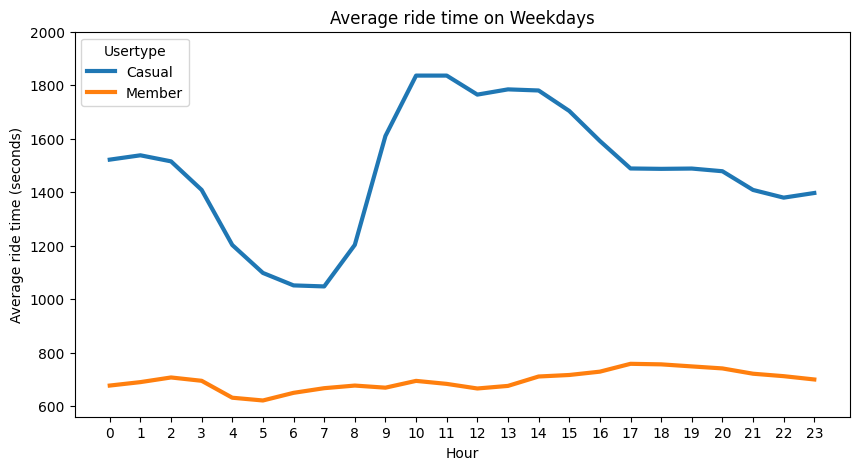

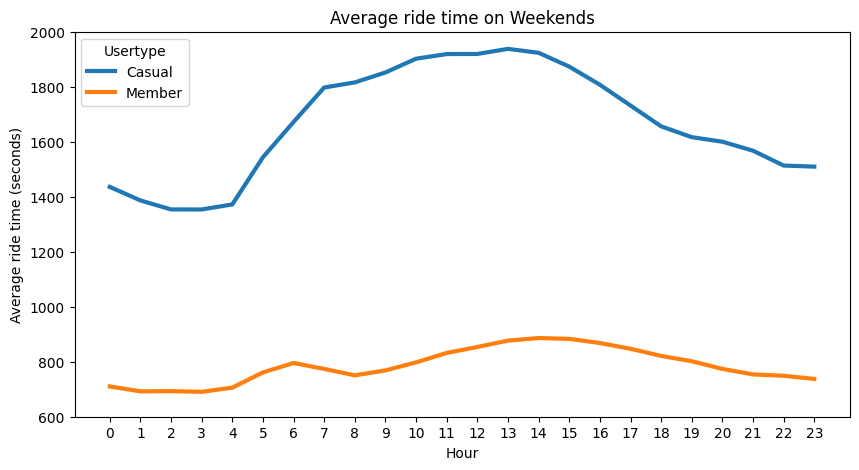

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

columns = ['st_hour', 'usertype', 'trip_duration']
groups = ['st_hour', 'usertype']

week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
cond = (bike_df['st_day_name'].isin(week))

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_hour'].unique()))
ax.set_yticks(list(range(600, 2001, 200)))

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Hour')
ax.set_ylabel('Average ride time (seconds)')
ax.set_title('Average ride time on Weekdays')

plt.legend(title='Usertype', loc='upper left', labels=['Casual', 'Member'])
plt.show()

fig, ax = plt.subplots(figsize=(10, 5))

weekend = ['Sunday', 'Saturday']
cond = (bike_df['st_day_name'].isin(weekend))

ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=3)

ax.set_xticks(list(bike_df['st_hour'].unique()))
ax.set_yticks(list(range(600, 2001, 200)))

ax.ticklabel_format(style='plain', axis='y')
ax.set_xlabel('Hour')
ax.set_ylabel('Average ride time (seconds)')
ax.set_title('Average ride time on Weekends')

plt.legend(title='Usertype', loc='upper left', labels=['Casual', 'Member'])
plt.show()

Average ride time is much higher consistently for Casual riders than for member riders. This is useful to know as well as it might help to distinguish outlier casual riders who take shorter trips that would be optimal targets for conversion to a member. Member average ride time also varry much less than casual ride times.

### Query Functions
These are functions that are useful because they allow for a more nuanced view of particular periods of time.

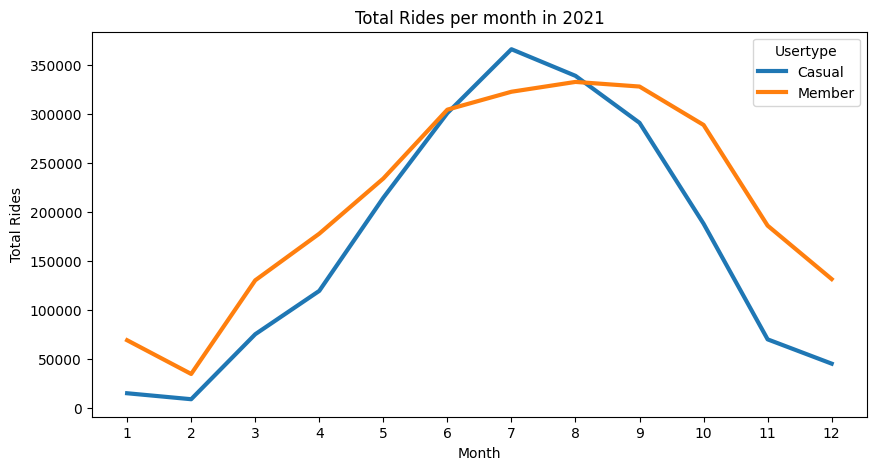

In [41]:
# This function provides a monthly view for a chosen year
def year_mbr_split(year=int):

    fig, ax = plt.subplots(figsize=(10, 5))

    columns = ['st_month', 'st_year', 'usertype', 'trip_duration']
    groups = ['st_month', 'usertype']
    cond = (bike_df['st_year'] == year)

    ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=3)

    ax.set_xticks(list(bike_df.loc[bike_df['st_year'] == year, 'st_month'].unique()))
    ax.ticklabel_format(style='plain')
    ax.set_xlabel('Month')
    ax.set_ylabel('Total Rides')
    ax.set_title(f'Total Rides per month in {year}')

    plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])

    plt.show()

year_mbr_split(2021)

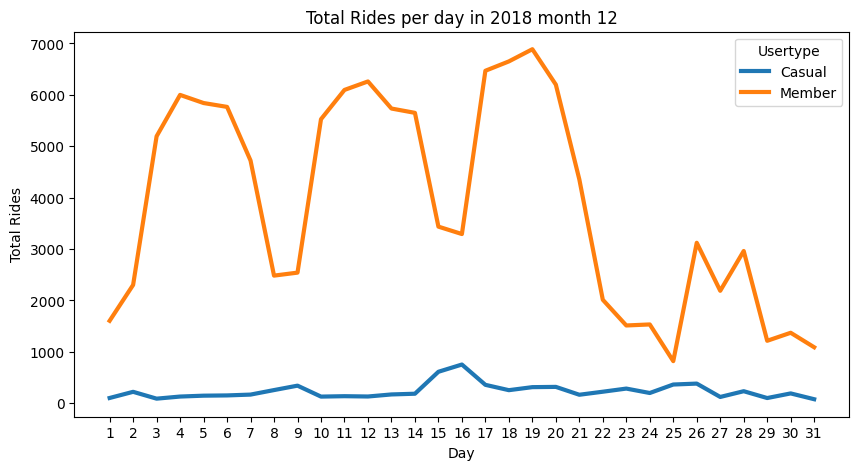

In [42]:
# This function provides a daily view for a chosen month
def month_mbr_split(year=int, month=int):

    fig, ax = plt.subplots(figsize=(10, 5))

    columns = ['st_day', 'st_month', 'st_year', 'usertype', 'trip_duration']
    groups = ['st_day', 'usertype']
    cond = (bike_df['st_year'] == year) & (bike_df['st_month'] == month)

    ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=3)

    ax.set_xticks(list(bike_df.loc[cond, 'st_day'].unique()))
    ax.ticklabel_format(style='plain')
    ax.set_xlabel('Day')
    ax.set_ylabel('Total Rides')
    ax.set_title(f'Total Rides per day in {year} month {month}')

    plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])

    plt.show()

month_mbr_split(year=2018, month=12)

Function above allows for a look at the total rides over the course of a month.

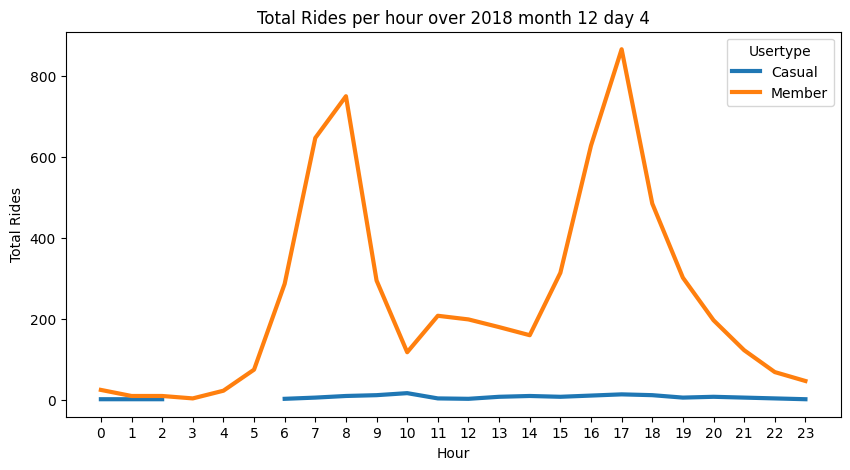

In [43]:
# This function provides an hourly view for a chosen day
def day_mbr_split(year=int, month=int, day=int):
    fig, ax = plt.subplots(figsize=(10, 5))

    columns = ['st_hour', 'st_day', 'st_month', 'st_year', 'usertype', 'trip_duration']
    groups = ['st_hour', 'usertype']
    cond = (bike_df['st_year'] == year) & (bike_df['st_month'] == month) & (bike_df['st_day'] == day)

    ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=3)
    ax.set_xticks(list(range(0, 24)))
    ax.ticklabel_format(style='plain')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Total Rides')
    ax.set_title(f'Total Rides per hour over {year} month {month} day {day}')

    plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])

    plt.show()

day_mbr_split(year=2018, month=12, day=4)

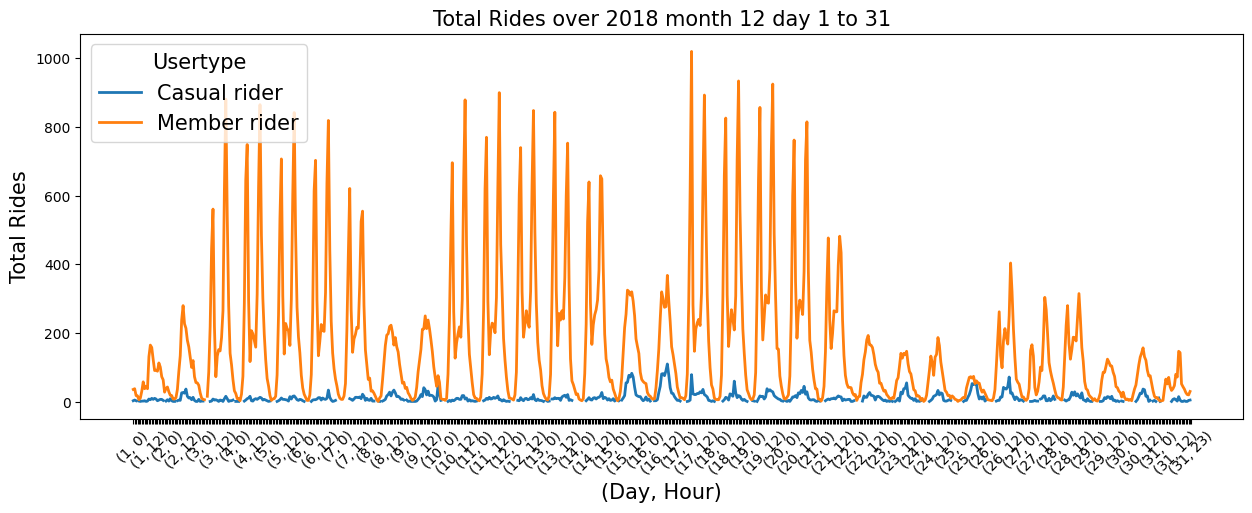

In [44]:
# This function provides an hourly view of a particular month from a particular year
def month_by_day_hourly_split(year=int, month=int, days=[]):
    
    if type(days) == int:
        days = [days]
    
    columns = ['st_hour', 'st_day', 'st_month', 'st_year', 'usertype', 'trip_duration']
    groups = ['st_day', 'st_hour', 'usertype']
    
    cond = (bike_df['st_year'] == year) & (bike_df['st_month'] == month)
    
    if len(days) == 0:
        days = [bike_df[columns].loc[(bike_df['st_year'] == year) & (bike_df['st_month'] == month)]['st_day'].min(),
                bike_df[columns].loc[(bike_df['st_year'] == year) & (bike_df['st_month'] == month)]['st_day'].max()]

    size = 10
    lw = 3
    
    if days[-1] - days[0] >= 6:
        size = 15
        lw = 2
    
    fig, ax = plt.subplots(figsize=(size, 5))
    
    
    # We use -1 instead of 1 for our max range value because it allows us to interpret day lists that are continous such as 
    # [1, 2, 3] as well as [min, max] only
    days = list(range(days[0], days[-1] + 1))
        
    cond = cond & (bike_df['st_day'].isin(days))
    
    ax = bike_df[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack().plot(ax=ax, linewidth=lw)
    
    num_hours = len(days) * 24

    ax.set_xticks(list(range(0, num_hours)))

    test = []
    k = 0
    
    for i in range(0, num_hours):
        if i % 24 == 0:
            k += 1
            test.append(f'({k}, 0)')  

        elif i % 12 == 0:
            test.append(f'({k}, 12)')

        elif i == (num_hours - 1):
            test.append(f'({k}, 23)')

        else:
            test.append('')

    ax.set_xlabel('(Day, Hour)', fontsize=size)
    ax.set_ylabel('Total Rides', fontsize=size)
    ax.set_xticklabels(test)
    ax.set_title(f'Total Rides over {year} month {month} day {days[0]} to {days[-1]}', fontsize=size)
    
    plt.legend(title='Usertype', loc='upper left', labels=['Casual rider', 'Member rider'], fontsize=size, title_fontsize=size)
    plt.xticks(rotation=45)
    plt.show()

month_by_day_hourly_split(year=2018, month=12)

## City Analysis
Starting with city; 0 is Chicago, 1 is Evanston, 2 is Oak Park

In [45]:
bike_df['start_city'].value_counts()

0    32874746
1      133210
2       18430
Name: start_city, dtype: int64

In [46]:
bike_df['end_city'].value_counts()

0    32872645
1      134483
2       19258
Name: end_city, dtype: int64

In [47]:
bike_df.loc[(bike_df['start_city'] == 0) & (bike_df['end_city'] == 0)].shape[0] / bike_df.shape[0]

0.9938298728780073

Our value counts are roughly similar; Our users are almost exclusively using our bikes for intercity travel in Chicago. In both our start and end city value count, 99.37% of the trips are from Chicago, to Chicago. Due to the extreme nature of this split, I doubt that there will be much of a deviation based on the casual/member split.

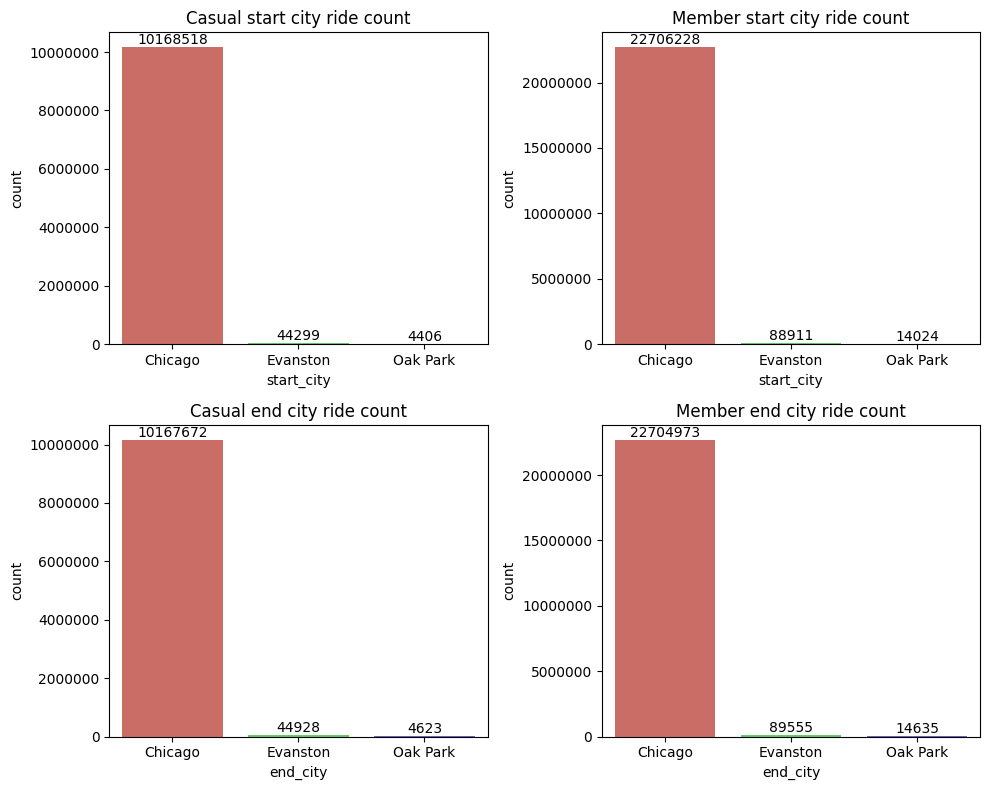

In [48]:
fig = plt.figure(figsize=(10, 8))
fig.add_subplot(2, 2, 1)

columns = ['usertype', 'start_city']

# casual only
# This plot is a countplot of the above values
ax_1 = sns.countplot(x='start_city', data=bike_df[columns].loc[bike_df['usertype'] == 0], palette='hls')
ax_1.bar_label(ax_1.containers[0], fmt = '%d')
ax_1.ticklabel_format(style='plain', axis='y')
ax_1.set_title('Casual start city ride count')
# Note that this may need changing if order changes.
ax_1.set_xticklabels(['Chicago', 'Evanston', 'Oak Park'])
fig.add_subplot(2, 2, 2)

# members only
# This plot is a countplot of the above values
ax_2 = sns.countplot(x='start_city', data=bike_df[columns].loc[bike_df['usertype'] == 1], palette='hls')
ax_2.bar_label(ax_2.containers[0], fmt = '%d')
ax_2.ticklabel_format(style='plain', axis='y')
ax_2.set_title('Member start city ride count')
# Note that this may need changing if order changes.
ax_2.set_xticklabels(['Chicago', 'Evanston', 'Oak Park'])
fig.add_subplot(2, 2, 3)

columns = ['usertype', 'end_city']

# casual only
# This plot is a countplot of the above values
ax_3 = sns.countplot(x='end_city', data=bike_df[columns].loc[bike_df['usertype'] == 0], palette='hls')
ax_3.bar_label(ax_3.containers[0], fmt = '%d')
ax_3.ticklabel_format(style='plain', axis='y')
ax_3.set_title('Casual end city ride count')
# Note that this may need changing if order changes.
ax_3.set_xticklabels(['Chicago', 'Evanston', 'Oak Park'])
fig.add_subplot(2, 2, 4)

# members only
# This plot is a countplot of the above values
ax_4 = sns.countplot(x='end_city', data=bike_df[columns].loc[bike_df['usertype'] == 1], palette='hls')
ax_4.bar_label(ax_4.containers[0], fmt = '%d')
ax_4.ticklabel_format(style='plain', axis='y')
ax_4.set_title('Member end city ride count')
# Note that this may need changing if order changes.
ax_4.set_xticklabels(['Chicago', 'Evanston', 'Oak Park'])

plt.tight_layout()
plt.show()

In [49]:
92175 / 41981

2.1956361211024036

In [50]:
92824 / 42669

2.1754435304319295

In [51]:
14252 / 4332

3.2899353647276084

In [52]:
14854 / 4559

3.258170651458653

Members take ~3.26 times more rides that end in Oak Park.


These metrics makes sense, as perhaps it illustrates the idea that people are more likely to purchase a membership if they are using the bikes as a constant means of transportation between cities, perhaps from where they live to work and back.

Despite this fact, the sheer volume of intercity Chicago trips, or trips that involve Chicago means that this is where our main focus should lie in any advertisement or promotional campaign to gain more members. 

I will not bother with analysis over time at this level because it simply won't be worth the effort; we will gain much more insight analyzing by stations located in Evanston or Oak Park than simply giving a simple count, sum, average ride time summary by city that doesn't reveal anything about their actual respective differences between one another.

Let's dive a level deeper into the idea of breaking up our data based on location: differentiating by stations.

## Top Network Stations

One of the most interesting things that we may be able to glean from our data is by analyzing the top stations. We will look at top traffic, top casual traffic, top member traffic, top member/casual split, top casual/member split.

In [53]:
len(set(list(bike_df['start_station_name'].unique()) + list(bike_df['end_station_name'].unique())))

1313

There are 1,313 unique stations in our data. We first want to examine the top ten by sheer volume, to examine why these areas are highly trafficked.

In [54]:
bike_df['start_station_name'].value_counts()[:10]

Streeter Dr & Grand Ave               639903
DuSable Lake Shore Dr & Monroe St     404450
Theater on the Lake                   342792
DuSable Lake Shore Dr & North Blvd    339347
Clinton St & Washington Blvd          338560
Michigan Ave & Oak St                 326433
Canal St & Adams St                   323739
Millennium Park                       317102
Clinton St & Madison St               305391
Columbus Dr & Randolph St             259337
Name: start_station_name, dtype: int64

In [55]:
sum(bike_df['start_station_name'].value_counts()[:10]) / bike_df.shape[0]

0.10891455092906623

Above we can see that our top ten start stations account for ~ 10.9% of all of the traffic start points on our bike network.

In [56]:
bike_df['end_station_name'].value_counts()[:10]

Streeter Dr & Grand Ave               714568
DuSable Lake Shore Dr & North Blvd    381402
DuSable Lake Shore Dr & Monroe St     379773
Theater on the Lake                   364305
Michigan Ave & Oak St                 344948
Millennium Park                       344070
Clinton St & Washington Blvd          334717
Canal St & Adams St                   311620
Clinton St & Madison St               295111
Michigan Ave & Washington St          261229
Name: end_station_name, dtype: int64

In [57]:
sum(bike_df['end_station_name'].value_counts()[:10]) / bike_df.shape[0]

0.11299277492850716

Above we can see that our top ten end stations account for ~ 11.3% of all of the end traffic on our bike network.

In [58]:
# This function returns 'num' of top stations, 'detailed' includes overlap and pre-overlap count, and 'full' provides station
# ride count for all stations in the network.

def top_stations(num=5, detailed=False, full=False):
    
    l1 = bike_df['start_station_name'].value_counts().tolist()
    l1_i = bike_df['start_station_name'].value_counts().index.tolist()
    
    l2 = bike_df['end_station_name'].value_counts().tolist()
    l2_i = bike_df['end_station_name'].value_counts().index.tolist()
    
    temp_dict = {}
    
    for i in range(len(l1_i)):
        if l1_i[i] in l2_i:
            temp_dict[l1_i[i]] = l1[i]
    
    for k in range(len(l2_i)):
        if l2_i[k] in l1_i:
            temp_dict[l2_i[k]] += l2[k]
    
    temp_df = pd.DataFrame.from_dict(temp_dict, orient='index', columns=['total_rides_w_overlap'])
    temp_df.reset_index(inplace=True)
    temp_df = temp_df.rename(columns={'index':'station_name'})
    temp_df = temp_df.sort_values('total_rides_w_overlap', ascending=False).reset_index(drop=True)
    
    columns = ['start_station_name', 'end_station_name']
    condition = bike_df['start_station_name'] == bike_df['end_station_name']
    
    temp_df2 = pd.DataFrame(bike_df[columns].loc[condition]['start_station_name'].value_counts())
    temp_df2.reset_index(inplace=True)
    temp_df2 = temp_df2.rename(columns={'start_station_name':'olap_ct', 'index':'station_name'})

    x = pd.merge(temp_df, temp_df2, how='left')
    x = x.fillna(0)
    x['olap_ct'] = x['olap_ct'].astype('int32')
    x['unique_total_rides'] = x['total_rides_w_overlap'] - x['olap_ct']
    x = x.sort_values('unique_total_rides', ascending=False).reset_index(drop=True)
    
    if detailed:
        if full:
            return x
        else:
            return x.head(num)
    else:
        if full:
            return x[['station_name', 'unique_total_rides']]
        else:
            return x[['station_name', 'unique_total_rides']].head(num)

In [59]:
top_stations(5)

,station_name,unique_total_rides
0,Streeter Dr & Grand Ave,1277029
1,DuSable Lake Shore Dr & Monroe St,723983
2,DuSable Lake Shore Dr & North Blvd,696097
3,Theater on the Lake,678414
4,Clinton St & Washington Blvd,670770


In [60]:
top_stations(10, detailed=True, full=True)

,station_name,total_rides_w_overlap,olap_ct,unique_total_rides
0,Streeter Dr & Grand Ave,1354471,77442,1277029
1,DuSable Lake Shore Dr & Monroe St,784223,60240,723983
2,DuSable Lake Shore Dr & North Blvd,720749,24652,696097
3,Theater on the Lake,707097,28683,678414
4,Clinton St & Washington Blvd,673277,2507,670770
...,...,...,...,...
1307,Public Rack - Maplewood Ave & 47th St,2,0,2
1308,Public Rack - Talman Ave & Pershing Rd,2,0,2
1309,Public Rack - Bensley Ave & 103rd St,2,0,2
1310,Public Rack - Kedzie Ave & Walnut St,2,1,1


### Five Highest traffic stations:


#### Streeter Dr & Grand Ave: 1277029 unique rides

Streeter Dr & Grand Ave is the most popular station amongst our 1,313 stations. It is surrounded by popular destinations in Chicago. It is right on Navy Pier, a popular tourist attraction, three different parks, and Ohio Street Beach.

#### DuSable Lake Shore Dr & Monroe St: 723983 unique rides

DuSable Lake Shore Dr & Monroe St station is situated right next to a yatch/boat dock and rental service hub. It is also the closest station to Butler Field, a popular concert and festival location. It is also in close proximity to Maggie Daley Park, a large park with many facilities for sports as well as a Play Garden for children. Lastly, the station is also a great starting point for a ride along the Monroe Harbor down to Buckingham Fountain, Grant Park, the Shedd Aquarium, and the Field Museum.

#### DuSable Lake Shore Dr & North Blvd: 696097 unique rides

DuSable Lake Shore Dr & North Blvd station is the closest bike station to North Avenue Beach, a major tourist attraction. It is also in close proximity to noteable chicago locations such as the Frances Willard Memorial Fountain, and is not a long walk away from the Benjamin Franklin Monument.

#### Theater on the Lake: 678414 unique rides

Theater on the Lake station is popular because it offers a great view of Lake Michigan, along with a Year-round program of contemporary plays and a popular restaurant. It is situated next to a trail and is a very easy location to access due to its proximity to US Hwy 41.

#### Clinton St & Washington Blvd: 670770 unique rides

This station in close proximity to a few hotels and in the downtown chicago area.


#### Conclusion:

Our most highly trafficked stations are all in close proximity to popular destinations such as parks, landmarks, and major tourist/event going locations. Thus I suspect that the member ride share for these locations will be low.

## Member Share of Rides Analysis

This section will be used to examine the member concentration of each station, in terms of member rides vs total rides.

In [61]:
# 'ride_ct_lwr_bnd' is the minimum number of interactions a station needs to have with rides in order to be included in the
# dataframe.

def get_member_pct_dataframe(ride_ct_lwr_bnd=0):
    no_loops = (bike_df['start_station_name'] != bike_df['end_station_name'])
    mbr_cond = (bike_df['usertype'] == 1)
    
    sta_vals = bike_df.loc[mbr_cond, 'start_station_name'].value_counts().tolist()
    sta_ind = bike_df.loc[mbr_cond, 'start_station_name'].value_counts().index.tolist()
    end_vals = bike_df.loc[mbr_cond & no_loops, 'end_station_name'].value_counts().tolist()
    end_ind = bike_df.loc[mbr_cond & no_loops, 'end_station_name'].value_counts().index.tolist()

    x = pd.DataFrame(list(zip(sta_ind, sta_vals)),
                       columns =['station_name', 'start_ride_ct'])
    y = pd.DataFrame(list(zip(end_ind, end_vals)),
                       columns =['station_name', 'end_ride_ct'])
    x_y = pd.merge(x, y)

    x_y['member_rides'] = x_y['start_ride_ct'] + x_y['end_ride_ct']

    x_y = x_y.sort_values('member_rides', ascending=False)
    #
    user_cond_0 = (bike_df['usertype'] == 0)
    
    sta_vals_c = bike_df.loc[user_cond_0, 'start_station_name'].value_counts().tolist()
    sta_ind_c = bike_df.loc[user_cond_0, 'start_station_name'].value_counts().index.tolist()
    end_vals_c = bike_df.loc[user_cond_0 & no_loops, 'end_station_name'].value_counts().tolist()
    end_ind_c = bike_df.loc[user_cond_0 & no_loops, 'end_station_name'].value_counts().index.tolist()

    x2 = pd.DataFrame(list(zip(sta_ind_c, sta_vals_c)),
                       columns =['station_name', 'start_ride_ct_c'])
    y2 = pd.DataFrame(list(zip(end_ind_c, end_vals_c)),
                       columns =['station_name', 'end_ride_ct_c'])

    x_y2 = pd.merge(x2, y2)

    x_y2['casual_rides'] = x_y2['start_ride_ct_c'] + x_y2['end_ride_ct_c']

    x_y2 = x_y2.sort_values('casual_rides', ascending=False)

    x_y_c = pd.merge(x_y, x_y2, left_on='station_name', right_on='station_name')
    x_y_c['total_rides'] = x_y_c['member_rides'] + x_y_c['casual_rides']
    x_y_c['member_concentration'] = round(x_y_c['member_rides'] / (x_y_c['member_rides'] + x_y_c['casual_rides']), 4)

    x_y_c = x_y_c.loc[x_y_c['total_rides'] >= ride_ct_lwr_bnd]

    x_y_c = x_y_c.sort_values('member_concentration', ascending=False)
    x_y_c = x_y_c.reset_index(drop=True)

    return x_y_c

In [62]:
# This function returns a report on the top/bottom 'station_num' stations that includes their name, ride count, and member
# concentration. 'ride_ct_lwr_bd' is the minimum number of interactions a station needs to have with rides in order to be 
# included in the report.

def concentration_report(station_num=5, ride_ct_lwr_bd=0):
    total_rides = bike_df.shape[0]
    mbr_ct_df = get_member_pct_dataframe(ride_ct_lwr_bd)
    pct_cap = round(((mbr_ct_df['total_rides'].sum() / 2 ) / total_rides) * 100, 2)
    
    print(f'About {pct_cap}% of rides captured given {ride_ct_lwr_bd} rides needed for station to be evaluated')
    
    # Top 5 Stations
    mbr_ct_df.sort_values('member_concentration', ascending=False)
    print(f'\nOur {station_num} stations with the highest concentration of member riders are:\n')
    
    top_sum = 0
    for i in range(station_num):
        st = mbr_ct_df.loc[i]
        top_sum += st.total_rides
        
        print(f'\t{st.station_name} : {round(st.member_concentration * 100, 2)}% member concentration, {st.total_rides} rides')
    
    #print('\n')
    top_cap = round(round(top_sum / total_rides, 4) * 100, 2)
    print(f'\nThe total for our top 5 stations is {top_sum} out of {total_rides} rides, or {top_cap}%')
    
    print('\n')
    
    # Bottom 5 Stations
    mbr_ct_df = mbr_ct_df.sort_values('member_concentration', ascending=True).reset_index(drop=True)
    print(f'Our {station_num} stations with the lowest concentration of member riders are:\n')
    
    bot_sum = 0
    for i in range(station_num):
        st = mbr_ct_df.loc[i]
        bot_sum += st.total_rides
        
        print(f'\t{st.station_name} : {round(st.member_concentration * 100, 4)}% member concentration, {st.total_rides} rides')
        
    #print('\n')
    bot_cap = round(round(bot_sum / total_rides, 4) * 100, 2)
    print(f'\nThe total for our top 5 stations is {bot_sum} out of {total_rides} rides, or {bot_cap}%')

I will use these functions to examine more closely how member concentration relates to station traffic. I want to examine stations with a large amount of riders, so I will make sure that there are above 1,000 rides total as our ride_ct_lwr_bd.

In [63]:
concentration_report(station_num=5, ride_ct_lwr_bd=1000)

About 97.25% of rides captured given 1000 rides needed for station to be evaluated

Our 5 stations with the highest concentration of member riders are:

	Loomis St & Taylor St : 94.71% member concentration, 52506 rides
	Halsted St & Blackhawk St : 94.55% member concentration, 49370 rides
	Financial Pl & Congress Pkwy : 94.27% member concentration, 16155 rides
	Ashland Ave & Harrison St : 93.98% member concentration, 38187 rides
	Ravenswood Ave & Montrose Ave : 93.58% member concentration, 16442 rides

The total for our top 5 stations is 172660 out of 33026386 rides, or 0.52%


Our 5 stations with the lowest concentration of member riders are:

	Streeter Dr & Grand Ave : 20.42% member concentration, 1277029 rides
	Shedd Aquarium : 21.5% member concentration, 359672 rides
	Buckingham Fountain : 21.77% member concentration, 135705 rides
	Field Museum : 22.28% member concentration, 223217 rides
	DuSable Lake Shore Dr & Monroe St : 23.5% member concentration, 723983 rides

The total for our

I have noticed that while our highest concentration of member rides stations comprise a smaller portion of the total rides, the member concentration seem to decrease slower than our lowest member concentration stations.

This means that our distributions of stations that are involved in may be skewed. It is likely that the number of stations with a member concentration above 50% are greater than the number of stations with a member concentration lower than 50%. I also believe that the number of users per station will trend upwards while the member concentration trends downwards. I will test this now.

In [64]:
# this function can produce a kdeplot of all stations above or below a defined split point

def ct_density_plt(input_df=None, ct_split=0.5, split_type='above', ride_ct_lwr_bnd=0, inclusive=False, summary=False):

    if type(input_df) == pd.core.frame.DataFrame:
        temp_df = input_df
    else:
        temp_df = get_member_pct_dataframe(ride_ct_lwr_bnd)
    
    if split_type == 'above':
        if inclusive:
            data = temp_df.loc[(temp_df['member_concentration'] >= ct_split)]
        else:
            data = temp_df.loc[(temp_df['member_concentration'] > ct_split)]
    elif split_type == 'below':
        if inclusive:
            data = temp_df.loc[(temp_df['member_concentration'] <= ct_split)]
        else:
            data = temp_df.loc[(temp_df['member_concentration'] < ct_split)]
    
    upper_lim = max([data['member_rides'].max(), data['casual_rides'].max()])
    
    # We don't have a station over 10**7 in our dataset, so this solution is alright for now
    if upper_lim >= 10**6:
        div = 10 ** (len(str(upper_lim)) - 2) 
        temp_upper_lim = (round(upper_lim / div) + 1) * div
    else:
        div = 10 ** (len(str(upper_lim)) - 1)
        temp_upper_lim = (round(upper_lim / div)) * div
        
    upper_lim = temp_upper_lim
    
    ax = sns.kdeplot(x=data['member_rides'], fill=True, color="r")
    ax = sns.kdeplot(x=data['casual_rides'], fill=True, color="b")
    
    ax.set_xticks(range(0, upper_lim + 1, div))
    
    plt.xlim(0, upper_lim)
    plt.xlabel('Rides')
    plt.legend(title='Usertype', loc='upper right', labels=['Member', 'Casual'])
    
    sta_ct = data.shape[0]
    r_ct = data['total_rides'].sum() // 2
    
    if inclusive:
        if split_type == 'above':
            ax.set_title(f'From {sta_ct} stations including {r_ct} total rides where member concentration >= {ct_split * 100}%')
        elif split_type == 'below':
            ax.set_title(f'From {sta_ct} stations including {r_ct} total rides where member concentration <= {ct_split * 100}%')
    else:
        if split_type == 'above':
            ax.set_title(f'From {sta_ct} stations including {r_ct} total rides where member concentration > {ct_split * 100}%')
        elif split_type == 'below':
            ax.set_title(f'From {sta_ct} stations including {r_ct} total rides where member concentration < {ct_split * 100}%')
            
    if summary:
        return ax
    
    plt.show()

In [65]:
# This function returns two plots by making two calls to the concentration_density plot function,
# one below the split point and one above
def cd_summary(input_df=None, ct_split=0.5, ride_ct_lwr_bnd=0):
    fig = plt.figure(figsize=(10, 8))
    fig.add_subplot(2, 1, 1)
    
    ax1 = ct_density_plt(input_df=input_df,
                                ct_split=ct_split,
                                split_type='below',
                                ride_ct_lwr_bnd=ride_ct_lwr_bnd,
                                inclusive=True,
                                summary=True)
    
    fig.add_subplot(2, 1, 2)

    ax2 = ct_density_plt(input_df=input_df,
                                ct_split=ct_split,
                                split_type='above',
                                ride_ct_lwr_bnd=ride_ct_lwr_bnd,
                                inclusive=False,
                                summary=True)
    
    ax1.ticklabel_format(style='plain', axis='x')
    ax1.ticklabel_format(style='plain', axis='y')
    ax2.ticklabel_format(style='plain', axis='x')
    ax2.ticklabel_format(style='plain', axis='y')


    plt.tight_layout()
    plt.show()

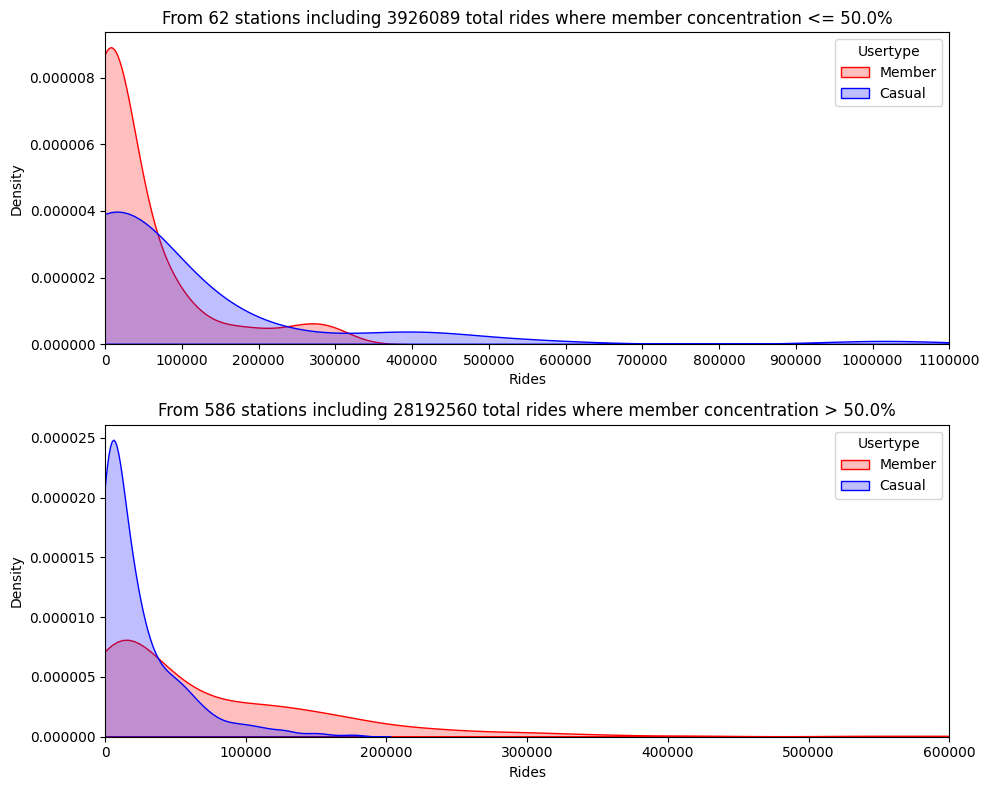

In [66]:
cd_summary(ride_ct_lwr_bnd=1000)

In [67]:
3926089 // 62

63324

In [68]:
28192560 // 586

48110

One insight to be gained by this type of comparison is the difference in the number of stations based on the member concentration split. Only 57 stations have start/end ride member concentrations below 50%, while 591 stations have start/end ride member concentrations above 50%.

Our average number of total rides for casual rider dominated stations is 65,919 rides per station.

Our average number of total rides for member dominated stations is 47,402 rides per station.

This difference is significant, and it indicates that stations that are skewed towards casual riders have more rides on average than stations that are skewed towards member riders. 

This means that more popular stations have more casual riders, and that because we are trying to target casual riders to convert to member riders, that these stations may not be the best place to concentrate our efforts, because despite the large amount of potential traffic that can be targeted at these stations, the riders are more likely to be utilizing our bike rental service as a temporary means of transportation during a tourist outing rather than a long term commute plan.

In [69]:
get_member_pct_dataframe(ride_ct_lwr_bnd=1000)

,station_name,start_ride_ct,end_ride_ct,member_rides,start_ride_ct_c,end_ride_ct_c,casual_rides,total_rides,member_concentration
0,Loomis St & Taylor St,25074,24657,49731,1054,1721,2775,52506,0.9471
1,Halsted St & Blackhawk St,22719,23959,46678,903,1789,2692,49370,0.9455
2,Financial Pl & Congress Pkwy,7684,7545,15229,546,380,926,16155,0.9427
3,Ashland Ave & Harrison St,18086,17802,35888,1332,967,2299,38187,0.9398
4,Ravenswood Ave & Montrose Ave,8179,7207,15386,383,673,1056,16442,0.9358
...,...,...,...,...,...,...,...,...,...
643,DuSable Lake Shore Dr & Monroe St,87915,82199,170114,316535,237334,553869,723983,0.2350
644,Field Museum,25152,24572,49724,95499,77994,173493,223217,0.2228
645,Buckingham Fountain,16181,13366,29547,62864,43294,106158,135705,0.2177
646,Shedd Aquarium,39389,37924,77313,156345,126014,282359,359672,0.2150


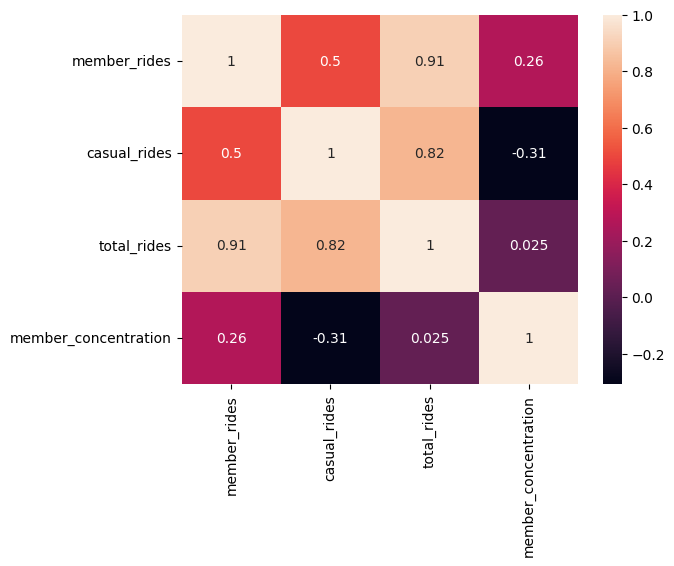

In [70]:
columns = ['member_rides', 'casual_rides', 'total_rides', 'member_concentration']
sns.heatmap(get_member_pct_dataframe(ride_ct_lwr_bnd=1000)[columns].corr(numeric_only=True), annot=True)
plt.show()

I was hoping to examine the relationship between member concetration and total rides further than this, however our correlation heatmap suggests that there isn't any relationship between the two factors that is significant enough to get a return on the amount of time it would take to investigate the relationship. 

Keep in mind that the data used above was a subset of the main bike_df data, as I curtailed all stations with less than 1000 interactions with total rides (total start_station and end_station rides combined).

I will now move on to examining the behaviour of our network's top stations.

Now figure out station behavior for top 5 stations: 

1. what were most popular start points to get to top 5 stations
2. what were most popular end points from top 5 stations
3. what is the overall member/casual split on the start and endpoints averaged?

## Examining Station Relationships

In [71]:
def station_routes_summary(input_name='', is_start=True, rts=5, ride_ct_lwr_bnd=0):
    temp_df = get_member_pct_dataframe(ride_ct_lwr_bnd=ride_ct_lwr_bnd).sort_values('total_rides', ascending=False).reset_index(drop=True)
    
    if is_start:
        l_st = bike_df.loc[bike_df['start_station_name'] == input_name, 'end_station_name'].value_counts()[:rts].tolist()
        l_st_id = bike_df.loc[bike_df['start_station_name'] == input_name, 'end_station_name'].value_counts()[:rts].index.tolist()
        l_st_mb_pct = []

        for i in range(len(l_st)):
            l_st_mb_pct.append(float(temp_df.loc[temp_df['station_name'] == f'{l_st_id[i]}', 'member_concentration']))
        
        type_l = ['End'] * len(l_st)

        new_df = pd.DataFrame(list(zip(l_st_id, l_st, l_st_mb_pct, type_l)),
                   columns =['end_station_name', 'ride_ct', 'mbr_pct', 'station_type'])
        
        return new_df
    
    elif not is_start:
        l_ed = bike_df.loc[bike_df['end_station_name'] == input_name, 'start_station_name'].value_counts()[:rts].tolist()
        l_ed_id = bike_df.loc[bike_df['end_station_name'] == input_name, 'start_station_name'].value_counts()[:rts].index.tolist()
        l_ed_mb_pct = [] 
    
        for i in range(len(l_ed)):
            l_ed_mb_pct.append(float(temp_df.loc[temp_df['station_name'] == f'{l_ed_id[i]}', 'member_concentration']))
    
        type_l = ['Start'] * len(l_ed)

        new_df = pd.DataFrame(list(zip(l_ed_id, l_ed, l_ed_mb_pct, type_l)),
                   columns =['start_station_name', 'ride_ct', 'mbr_pct', 'station_type'])
        
        return new_df

In [72]:
station_routes_summary(input_name='Streeter Dr & Grand Ave', is_start=True, rts=5, ride_ct_lwr_bnd=0)

,end_station_name,ride_ct,mbr_pct,station_type
0,Streeter Dr & Grand Ave,77442,0.2042,End
1,DuSable Lake Shore Dr & Monroe St,40413,0.2350,End
2,Theater on the Lake,37709,0.4373,End
3,DuSable Lake Shore Dr & North Blvd,35832,0.4103,End
4,Millennium Park,33117,0.3000,End


Now that we have our top stations associated by ride count, we need to figure out how to group by the associated stations. We can use the .isin() function to go based off of our list of stations that is returned by our station routes summary function.

In [73]:
def full_station_routes_summary(input_name='', rts=5, ride_ct_lwr_bnd=0):
    end_df = station_routes_summary(is_start=True, input_name=input_name, rts=5, ride_ct_lwr_bnd=ride_ct_lwr_bnd)
    start_df = station_routes_summary(is_start=False, input_name=input_name, rts=5, ride_ct_lwr_bnd=ride_ct_lwr_bnd)

    print(f'{input_name} bike station as ride startpoint:')
    display(end_df)
    st_pct = round((sum(end_df['mbr_pct'].values) / len(end_df['mbr_pct'].values)) * 100, 2)
    print(f'Avg end_station member concentration: {st_pct}%\n')
    
    print(f'\n{input_name} bike station as ride endpoint:')
    display(start_df)
    end_pct = round((sum(start_df['mbr_pct'].values) / len(start_df['mbr_pct'].values)) * 100, 2)
    print(f'Avg start_station member concentration: {end_pct}%\n')
    
    overlap = 0
    ol = False
    if input_name in end_df['end_station_name'].values:
        ol = True
        overlap = end_df.loc[end_df['end_station_name'] == input_name, 'ride_ct'].values[0]
    
    total_rides = sum(end_df['ride_ct'].values) + sum(start_df['ride_ct'].values) - overlap
    
    unique_stations = len(set(end_df['end_station_name'].values + start_df['start_station_name'].values))
    
    # A U B = A + B - AB
    cond1 = (bike_df['start_station_name'] == input_name)
    cond2 = (bike_df['end_station_name'] == input_name)
    both = (cond1 & cond2)
    
    
    a = bike_df[['start_station_name']].loc[cond1].shape[0]
    b = bike_df[['end_station_name']].loc[cond2].shape[0]
    ab = bike_df[['start_station_name', 'end_station_name']].loc[both].shape[0]
    
    total_rides_full = a + b - ab
    
    print('------------------------------------------------------------------------------------------')
    print(f'Total rides captured = {total_rides}')
    print(f'{unique_stations} unique stations out of {end_df.shape[0] + start_df.shape[0]} listed stations')
    if ol:
        print(f'Overlap for {input_name}. Accounts for {overlap} rides.' +
              'Alotted to startpoint rides, subtracted from endpoint rides')
    print(f'Total rides across all routes for {input_name}= {total_rides_full}')
    print(f'These stations account for {round((total_rides / total_rides_full) * 100, 2)}% of {input_name}\'s total traffic')
    print('------------------------------------------------------------------------------------------')

### A More in depth look at the Top 5 Trafficked Stations

#### Streeter Dr & Grand Ave: 1277029 rides

Streeter Dr & Grand Ave is the most popular station amongst our 1,313 stations. It is surrounded by popular destinations in Chicago. It is right on Navy Pier, a popular tourist attraction, three different parks, and Ohio Street Beach.

In [74]:
full_station_routes_summary(input_name='Streeter Dr & Grand Ave', rts=5, ride_ct_lwr_bnd=1000)

Streeter Dr & Grand Ave bike station as ride startpoint:


,end_station_name,ride_ct,mbr_pct,station_type
0,Streeter Dr & Grand Ave,77442,0.2042,End
1,DuSable Lake Shore Dr & Monroe St,40413,0.2350,End
2,Theater on the Lake,37709,0.4373,End
3,DuSable Lake Shore Dr & North Blvd,35832,0.4103,End
4,Millennium Park,33117,0.3000,End


Avg end_station member concentration: 31.74%


Streeter Dr & Grand Ave bike station as ride endpoint:


,start_station_name,ride_ct,mbr_pct,station_type
0,Streeter Dr & Grand Ave,77442,0.2042,Start
1,DuSable Lake Shore Dr & Monroe St,74049,0.2350,Start
2,Theater on the Lake,36641,0.4373,Start
3,DuSable Lake Shore Dr & North Blvd,33885,0.4103,Start
4,Millennium Park,27272,0.3000,Start


Avg start_station member concentration: 31.74%

------------------------------------------------------------------------------------------
Total rides captured = 396360
5 unique stations out of 10 listed stations
Overlap for Streeter Dr & Grand Ave. Accounts for 77442 rides.Alotted to startpoint rides, subtracted from endpoint rides
Total rides across all routes for Streeter Dr & Grand Ave= 1277029
These stations account for 31.04% of Streeter Dr & Grand Ave's total traffic
------------------------------------------------------------------------------------------


Here you can see that the most popular origin and end station for 'Streeter Dr & Grand Ave' is actually 'Streeter Dr & Grand Ave' itself. The rest of the stations are shared, and none of them are above a 50% member concentration, which tells me that a large portion of casual riders are not convertable to members because they are most likely tourists.

#### DuSable Lake Shore Dr & Monroe St: 723983 rides

DuSable Lake Shore Dr & Monroe St station is situated right next to a yatch/boat dock and rental service hub. It is also the closest station to Butler Field, a popular concert and festival location. It is also in close proximity to Maggie Daley Park, a large park with many facilities for sports as well as a Play Garden for children. Lastly, the station is also a great starting point for a ride along the Monroe Harbor down to Buckingham Fountain, Grant Park, the Shedd Aquarium, and the Field Museum.

In [75]:
full_station_routes_summary(input_name='DuSable Lake Shore Dr & Monroe St', rts=5, ride_ct_lwr_bnd=1000)

DuSable Lake Shore Dr & Monroe St bike station as ride startpoint:


,end_station_name,ride_ct,mbr_pct,station_type
0,Streeter Dr & Grand Ave,74049,0.2042,End
1,DuSable Lake Shore Dr & Monroe St,60240,0.2350,End
2,Shedd Aquarium,17206,0.2150,End
3,Adler Planetarium,16482,0.2849,End
4,DuSable Lake Shore Dr & North Blvd,13629,0.4103,End


Avg end_station member concentration: 26.99%


DuSable Lake Shore Dr & Monroe St bike station as ride endpoint:


,start_station_name,ride_ct,mbr_pct,station_type
0,DuSable Lake Shore Dr & Monroe St,60240,0.2350,Start
1,Streeter Dr & Grand Ave,40413,0.2042,Start
2,Shedd Aquarium,17242,0.2150,Start
3,Adler Planetarium,15408,0.2849,Start
4,Millennium Park,13638,0.3000,Start


Avg start_station member concentration: 24.78%

------------------------------------------------------------------------------------------
Total rides captured = 268307
5 unique stations out of 10 listed stations
Overlap for DuSable Lake Shore Dr & Monroe St. Accounts for 60240 rides.Alotted to startpoint rides, subtracted from endpoint rides
Total rides across all routes for DuSable Lake Shore Dr & Monroe St= 723983
These stations account for 37.06% of DuSable Lake Shore Dr & Monroe St's total traffic
------------------------------------------------------------------------------------------


Again, the member concentration does not go above 50% on all of these stations, and all but 2 stations are shared, which means that the convertability of casual riders into members is probably low due to a great amount of casual riders being tourists.

#### DuSable Lake Shore Dr & North Blvd: 696097 rides

DuSable Lake Shore Dr & North Blvd station is the closest bike station to North Avenue Beach, a major tourist attraction. It is also in close proximity to noteable chicago locations such as the Frances Willard Memorial Fountain, and is not a long walk away from the Benjamin Franklin Monument.

In [76]:
full_station_routes_summary(input_name='DuSable Lake Shore Dr & North Blvd', rts=5, ride_ct_lwr_bnd=1000)

DuSable Lake Shore Dr & North Blvd bike station as ride startpoint:


,end_station_name,ride_ct,mbr_pct,station_type
0,Streeter Dr & Grand Ave,33885,0.2042,End
1,DuSable Lake Shore Dr & North Blvd,24652,0.4103,End
2,Michigan Ave & Oak St,11681,0.3725,End
3,Theater on the Lake,10695,0.4373,End
4,DuSable Lake Shore Dr & Monroe St,9261,0.2350,End


Avg end_station member concentration: 33.19%


DuSable Lake Shore Dr & North Blvd bike station as ride endpoint:


,start_station_name,ride_ct,mbr_pct,station_type
0,Streeter Dr & Grand Ave,35832,0.2042,Start
1,DuSable Lake Shore Dr & North Blvd,24652,0.4103,Start
2,DuSable Lake Shore Dr & Monroe St,13629,0.2350,Start
3,Theater on the Lake,12538,0.4373,Start
4,Michigan Ave & Oak St,11958,0.3725,Start


Avg start_station member concentration: 33.19%

------------------------------------------------------------------------------------------
Total rides captured = 164131
5 unique stations out of 10 listed stations
Overlap for DuSable Lake Shore Dr & North Blvd. Accounts for 24652 rides.Alotted to startpoint rides, subtracted from endpoint rides
Total rides across all routes for DuSable Lake Shore Dr & North Blvd= 696097
These stations account for 23.58% of DuSable Lake Shore Dr & North Blvd's total traffic
------------------------------------------------------------------------------------------


There is no difference here, no stations are above 50% and all the stations are shared.

#### Theater on the Lake: 678414 rides

Theater on the Lake station is popular because it offers a great view of Lake Michigan, along with a Year-round program of contemporary plays and a popular restaurant. It is situated next to a trail and is a very easy location to access due to its proximity to US Hwy 41.

In [77]:
full_station_routes_summary(input_name='Theater on the Lake', rts=5, ride_ct_lwr_bnd=1000)

Theater on the Lake bike station as ride startpoint:


,end_station_name,ride_ct,mbr_pct,station_type
0,Streeter Dr & Grand Ave,36641,0.2042,End
1,Theater on the Lake,28683,0.4373,End
2,Michigan Ave & Oak St,19811,0.3725,End
3,DuSable Lake Shore Dr & North Blvd,12538,0.4103,End
4,Montrose Harbor,9193,0.4381,End


Avg end_station member concentration: 37.25%


Theater on the Lake bike station as ride endpoint:


,start_station_name,ride_ct,mbr_pct,station_type
0,Streeter Dr & Grand Ave,37709,0.2042,Start
1,Theater on the Lake,28683,0.4373,Start
2,Michigan Ave & Oak St,21746,0.3725,Start
3,DuSable Lake Shore Dr & Monroe St,11402,0.2350,Start
4,DuSable Lake Shore Dr & North Blvd,10695,0.4103,Start


Avg start_station member concentration: 33.19%

------------------------------------------------------------------------------------------
Total rides captured = 188418
5 unique stations out of 10 listed stations
Overlap for Theater on the Lake. Accounts for 28683 rides.Alotted to startpoint rides, subtracted from endpoint rides
Total rides across all routes for Theater on the Lake= 678414
These stations account for 27.77% of Theater on the Lake's total traffic
------------------------------------------------------------------------------------------


There is no difference here, no stations are above 50% and all the stations are shared but two stations.

#### Clinton St & Washington Blvd: 670770 unique rides

This station is located in close proximity to a few hotels and in the downtown chicago area.

In [78]:
full_station_routes_summary(input_name='Clinton St & Washington Blvd', rts=5, ride_ct_lwr_bnd=1000)

Clinton St & Washington Blvd bike station as ride startpoint:


,end_station_name,ride_ct,mbr_pct,station_type
0,Michigan Ave & Washington St,14277,0.6531,End
1,LaSalle St & Jackson Blvd,9403,0.8893,End
2,St Clair St & Erie St,9000,0.7297,End
3,Columbus Dr & Randolph St,7864,0.7307,End
4,State St & Kinzie St,7208,0.7073,End


Avg end_station member concentration: 74.2%


Clinton St & Washington Blvd bike station as ride endpoint:


,start_station_name,ride_ct,mbr_pct,station_type
0,Columbus Dr & Randolph St,14371,0.7307,Start
1,Michigan Ave & Washington St,14157,0.6531,Start
2,Michigan Ave & Lake St,9385,0.6453,Start
3,St Clair St & Erie St,8651,0.7297,Start
4,Kingsbury St & Kinzie St,7175,0.8643,Start


Avg start_station member concentration: 72.46%

------------------------------------------------------------------------------------------
Total rides captured = 101491
5 unique stations out of 10 listed stations
Total rides across all routes for Clinton St & Washington Blvd= 670770
These stations account for 15.13% of Clinton St & Washington Blvd's total traffic
------------------------------------------------------------------------------------------


There is no difference here, no stations are above 50% and all the stations are shared. This is a trend for popular stations.

We may hone in on only the past 3 years as focusing on a shorter and more relevant period of time is likely to provide us with more accurate insight as to possible future behavior as well as clue us in to potential actionable insights.

## Specific Station Changes over time

In [79]:
# This is a crude function

def over_time_mbpct_df(sta_name='', time_level='year', start_date='', end_date=''):
    
    columns = (['usertype', 'trip_duration', 'start_station_name', 'end_station_name',
                'start_time', 'st_year', 'st_month', 'st_day', 'st_hour'])
    
    if start_date == '':
        start_date = str(bike_df['end_date'].min())[:10]
    
    if end_date == '':
        end_date = str(bike_df['end_date'].max())[:10]
        
    time_constraint = (bike_df['start_date'].between(start_date, end_date))
    
    cond1 = (bike_df['start_station_name'] == sta_name)
    cond2 = (bike_df['end_station_name'] == sta_name)
    combined_cond = (cond1 & cond2)
    
    station = bike_df[columns].loc[time_constraint & (cond1 | cond2 | (combined_cond))].reset_index(drop=True)
        
    if time_level == 'year':
        include = ['st_year', 'usertype', 'trip_duration']
        groups = ['st_year', 'usertype']
        
    elif time_level == 'month':
        include = ['st_year', 'st_month', 'usertype', 'trip_duration']
        groups = ['st_year', 'st_month', 'usertype']
    
    elif time_level == 'day':
        include = ['st_year', 'st_month', 'st_day', 'usertype', 'trip_duration']
        groups = ['st_year', 'st_month', 'st_day', 'usertype']
    
    
    station = station[include].groupby(groups).count().unstack().fillna(0)
    
    station.columns = station.columns.from_tuples([('trip_count', 0), ('trip_count', 1)], names=[None, 'usertype'])
    
    mbpct = station[('trip_count', 1)].values / (station[('trip_count', 0)].values + station[('trip_count', 1)].values)
    
    mbpct_df = pd.DataFrame(mbpct, columns=['mbr_pct']).set_index(station.index).fillna(0)

    # display(station)
    
    return mbpct_df

In [80]:
def single_station_ridetime_report(sta_name='', time_level='year', start_date='', end_date='', ride_type='all'):

    columns = (['usertype', 'trip_duration', 'start_station_name', 'end_station_name',
                'start_time', 'st_year', 'st_month', 'st_day'])
    
    if start_date == '':
        start_date = str(bike_df['end_date'].min())[:10]
    
    if end_date == '':
        end_date = str(bike_df['end_date'].max())[:10]
        
    time_constraint = (bike_df['start_date'].between(start_date, end_date))
    
    # All rides involving station
    if ride_type == 'all':

        cond1 = (bike_df['start_station_name'] == sta_name)
        cond2 = (bike_df['end_station_name'] == sta_name)
        combined_cond = (cond1 & cond2)

        station = bike_df[columns].loc[time_constraint & (cond1 | cond2 | (combined_cond))].reset_index(drop=True)

    # All rides where station is starting point
    elif ride_type == 'from':
        
        cond1 = (bike_df['start_station_name'] == sta_name)
        cond2 = (bike_df['end_station_name'] == sta_name)
        combined_cond = (cond1 & cond2)

        station = bike_df[columns].loc[time_constraint & (cond1)].reset_index(drop=True)
    
    # All rides where station is ending point
    elif ride_type == 'to':
        
        cond1 = (bike_df['start_station_name'] == sta_name)
        cond2 = (bike_df['end_station_name'] == sta_name)
        combined_cond = (cond1 & cond2)

        station = bike_df[columns].loc[time_constraint & (cond2)].reset_index(drop=True)
    
    # All rides that loop (start and end at this station)
    elif ride_type == 'loop':
        
        cond1 = (bike_df['start_station_name'] == sta_name)
        cond2 = (bike_df['end_station_name'] == sta_name)
        combined_cond = (cond1 & cond2)

        station = bike_df[columns].loc[time_constraint & (combined_cond)].reset_index(drop=True)
    
    # Setting up labels.

    sum_tot = 0
    new_l = []
    new_l_basic = []

    years = list(station['st_year'].unique())

    month_ct = 0

    for i, year in enumerate(years):
        months = list(station.loc[station['st_year'] == year, 'st_month'].unique())
        day_ct = 0

        for k, month in enumerate(months):

            if (i == 0 and k == 0) or (year == years[-1] and month == months[-1]):
                new_l_basic.append(f'{month}/{year}')
            elif month == 1:
                new_l_basic.append(f'{month}/{year}')
            else:
                new_l_basic.append('')

            days = list(station.loc[(station['st_year'] == year) & (station['st_month'] == month), 'st_day'].unique())
            for j, day in enumerate(days):

                if (i == 0 and k == 0 and j == 0) or (year == years[-1] and month == months[-1] and day == days[-1]):
                    new_l.append(f'{month}/{day}/{year}')
                elif month == 1 and day == 1:
                    new_l.append(f'{month}/{day}/{year}')
                else:
                    new_l.append('')    

    # With day labels
    new_x_ticks = []
    new_labels = []

    for i, tick in enumerate(new_l):
        if tick != '':
            new_x_ticks.append(i)
            new_labels.append(tick)

    # Without day labels
    new_x_ticks_basic = []
    new_labels_basic = []

    for i, label in enumerate(new_l_basic):
        if label != '':
            new_x_ticks_basic.append(i)
            new_labels_basic.append(label)
    
    
    if time_level == 'month' or time_level == 'year':
    
        fig, ax = plt.subplots(figsize=(10, 5))

        columns = ['st_year', 'st_month', 'usertype', 'trip_duration']
        groups = ['st_year', 'st_month', 'usertype']

        ax = station[columns].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=3)

        ax.set_xticks(new_x_ticks_basic)
        ax.set_xticklabels(new_labels_basic)

        ax.set_xlabel('Date (MM/YYYY)')
        ax.set_ylabel('Average Ride time (seconds)')
        ax.set_title(f'{sta_name} Average Ride time per month from {new_labels_basic[0]} to {new_labels_basic[-1]}')

        plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])
        plt.xticks(rotation=45)
        plt.show()


    if time_level == 'day':
    
        fig, ax = plt.subplots(figsize=(10, 5))

        columns = ['st_day', 'st_year', 'st_month', 'usertype', 'trip_duration']
        groups = ['st_year', 'st_month', 'st_day', 'usertype']

        ax = station[columns].groupby(groups)['trip_duration'].mean().unstack().plot(ax=ax, linewidth=0.5)

        ax.set_xticks(new_x_ticks)
        ax.set_xticklabels(new_labels)

        ax.set_xlabel('Date (MM/DD/YYYY)')
        ax.set_ylabel('Average ride time (seconds)')
        ax.set_title(f'{sta_name} Average ride time per day from {new_labels[0]} to {new_labels[-1]}')

        plt.legend(title='Usertype', loc='upper right', labels=['Casual', 'Member'])
        plt.xticks(rotation=45)
        plt.show()
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    x = over_time_mbpct_df(sta_name=sta_name, 
                           time_level=time_level, 
                           start_date=start_date,
                           end_date=end_date)
    
    ax = x.plot(ax=ax, linewidth=1)

    ax.set_yticks([0.00, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 1.00])
    ax.set_ylabel('Member Ride Share of Total Rides (%)')
    
    ax.axhline(x['mbr_pct'].mean(), color="red")
    line_label = 'Historic Mean: ' + str(round(x['mbr_pct'].mean(), 4))
    ax.text(x = 0.01, y = x['mbr_pct'].mean() + 0.03, s = line_label, color="red", transform=ax.transAxes)
    ax.set_xlabel('Year')
    
    if time_level == 'month':
        ax.set_xticks(new_x_ticks_basic)
        ax.set_xticklabels(new_labels_basic)
        
        ax.set_title(f'{sta_name} Member Share of Total Rides per {time_level} from {new_labels[0]} to {new_labels[-1]}')
        ax.set_xlabel('(Year, Month)')
    elif time_level == 'day':
        ax.set_title(f'{sta_name} Member ride count Share of Total Rides per {time_level} from {start_date} to {end_date}')
        ax.set_xlabel('(Year, Month, Day)')
    
    plt.xticks(rotation=45)
    plt.show()

In [81]:
def single_station_rideable_type_report(sta_name='', time_level='year', start_date='', end_date='', ride_type='all'):

    columns = (['usertype', 'trip_duration', 'start_station_name', 'end_station_name',
                'rideable_type', 'start_time', 'st_year', 'st_month', 'st_day'])
    
    if start_date == '':
        start_date = str(bike_df['end_date'].min())[:10]
    
    if end_date == '':
        end_date = str(bike_df['end_date'].max())[:10]
        
    time_constraint = (bike_df['start_date'].between(start_date, end_date))
    
    # All rides involving station
    if ride_type == 'all':

        cond1 = (bike_df['start_station_name'] == sta_name)
        cond2 = (bike_df['end_station_name'] == sta_name)
        combined_cond = (cond1 & cond2)

        station = bike_df[columns].loc[time_constraint & (cond1 | cond2 | (combined_cond))].reset_index(drop=True)

    # All rides where station is starting point
    elif ride_type == 'from':
        
        cond1 = (bike_df['start_station_name'] == sta_name)
        cond2 = (bike_df['end_station_name'] == sta_name)
        combined_cond = (cond1 & cond2)

        station = bike_df[columns].loc[time_constraint & (cond1)].reset_index(drop=True)
    
    # All rides where station is ending point
    elif ride_type == 'to':
        
        cond1 = (bike_df['start_station_name'] == sta_name)
        cond2 = (bike_df['end_station_name'] == sta_name)
        combined_cond = (cond1 & cond2)

        station = bike_df[columns].loc[time_constraint & (cond2)].reset_index(drop=True)
    
    # All rides that loop (start and end at this station)
    elif ride_type == 'loop':
        
        cond1 = (bike_df['start_station_name'] == sta_name)
        cond2 = (bike_df['end_station_name'] == sta_name)
        combined_cond = (cond1 & cond2)

        station = bike_df[columns].loc[time_constraint & (combined_cond)].reset_index(drop=True)
    
    # Setting up labels.

    sum_tot = 0
    new_l = []
    new_l_basic = []

    years = list(station['st_year'].unique())

    month_ct = 0

    for i, year in enumerate(years):
        months = list(station.loc[station['st_year'] == year, 'st_month'].unique())
        day_ct = 0

        for k, month in enumerate(months):

            if (i == 0 and k == 0) or (year == years[-1] and month == months[-1]):
                new_l_basic.append(f'{month}/{year}')
            elif month == 1:
                new_l_basic.append(f'{month}/{year}')
            else:
                new_l_basic.append('')

            days = list(station.loc[(station['st_year'] == year) & (station['st_month'] == month), 'st_day'].unique())
            for j, day in enumerate(days):

                if (i == 0 and k == 0 and j == 0) or (year == years[-1] and month == months[-1] and day == days[-1]):
                    new_l.append(f'{month}/{day}/{year}')
                elif month == 1 and day == 1:
                    new_l.append(f'{month}/{day}/{year}')
                else:
                    new_l.append('')    

    # With day labels
    new_x_ticks = []
    new_labels = []

    for i, tick in enumerate(new_l):
        if tick != '':
            new_x_ticks.append(i)
            new_labels.append(tick)

    # Without day labels
    new_x_ticks_basic = []
    new_labels_basic = []

    for i, label in enumerate(new_l_basic):
        if label != '':
            new_x_ticks_basic.append(i)
            new_labels_basic.append(label)
    
    
    def check_columns(input_x):
        if input_x.shape[1] < 3:
    
            check_list = [0, 1, 2]

            for num in check_list:
                if num not in list(input_x.columns):

                    input_x[num] = [0] * input_x.shape[0]

        input_x = input_x[[0,1,2]]
        
        return input_x


    fig, ax = plt.subplots(figsize=(10, 5))

    if time_level == 'year':
    
        columns = ['st_year', 'rideable_type','trip_duration']
        groups = ['st_year', 'rideable_type']
        cond = (station['usertype'] == 0)

        x = station[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack()
        
        x = check_columns(x)
        
        ax = x.plot(ax=ax, linewidth=3)
        ax.set_xticks(list(station['st_year'].unique()))
        ax.ticklabel_format(style='plain')
        ax.set_xlabel('Year')
        ax.set_ylabel('Total Rides')
        ax.set_title(f'{sta_name} Total Casual Rides by Rideable Type over Year')
        
        plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])
        plt.show()
        
        fig, ax = plt.subplots(figsize=(10, 5))
        
        columns = ['st_year', 'rideable_type','trip_duration']
        groups = ['st_year', 'rideable_type']
        cond = (station['usertype'] == 1)

        x = station[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack()
        
        x = check_columns(x)
        
        ax = x.plot(ax=ax, linewidth=3)
        ax.set_xticks(list(station['st_year'].unique()))
        ax.ticklabel_format(style='plain')
        ax.set_xlabel('Year')
        ax.set_ylabel('Total Rides')
        ax.set_title(f'{sta_name} Total Member Rides by Rideable Type over Year')
        
        plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])
        plt.show()
        
    if time_level == 'month':
        
        columns = ['st_year', 'st_month', 'rideable_type','trip_duration']
        groups = ['st_year', 'st_month', 'rideable_type']
        cond = (station['usertype'] == 0)

        x = station[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack()
        
        x = check_columns(x)
        
        ax = x.plot(ax=ax, linewidth=3)

        ax.set_xlabel('(Year, Month)')
        ax.set_ylabel('Total Rides')
        ax.set_title(f'{sta_name} Total Casual Rides by Rideable Type over Year by Month')
                
        plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])
        plt.show()
        
        fig, ax = plt.subplots(figsize=(10, 5))

        columns = ['st_year', 'st_month', 'rideable_type','trip_duration']
        groups = ['st_year', 'st_month', 'rideable_type']
        cond = (station['usertype'] == 1)

        x = station[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack()
        
        x = check_columns(x)
        
        ax = x.plot(ax=ax, linewidth=3)

        ax.set_xlabel('(Year, Month)')
        ax.set_ylabel('Total Rides')
        ax.set_title(f'{sta_name} Total Member Rides by Rideable Type over Year by Month')
        
        plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])
        plt.show()

    if time_level == 'day':
        
        columns = ['st_year', 'st_month', 'st_day',  'rideable_type','trip_duration']
        groups = ['st_year', 'st_month', 'st_day', 'rideable_type']
        cond = (station['usertype'] == 0)

        x = station[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack()
        
        x = check_columns(x)
        
        ax = x.plot(ax=ax, linewidth=1)
        ax.set_xlabel('(Year, Month, Day)')
        ax.set_ylabel('Total Rides')
        ax.set_title(f'{sta_name} Total Casual Rides by Rideable Type over Year by Day')
        
        plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])
        plt.show()
        
        fig, ax = plt.subplots(figsize=(10, 5))
        
        columns = ['st_year', 'st_month', 'st_day',  'rideable_type','trip_duration']
        groups = ['st_year', 'st_month', 'st_day', 'rideable_type']
        cond = (station['usertype'] == 1)

        x = station[columns].loc[cond].groupby(groups)['trip_duration'].count().unstack()
        
        x = check_columns(x)
        
        ax = x.plot(ax=ax, linewidth=1)
        ax.set_xlabel('(Year, Month, Day)')
        ax.set_ylabel('Total Rides')
        ax.set_title(f'{sta_name} Total Member Rides by Rideable Type over Year by Day')
        
        plt.legend(title='Rideable Type', labels=['Classic bike', 'Docked Bike', 'Electric Bike'])
        plt.show()

### Streeter Dr & Grand Ave

In [82]:
station = (bike_df['start_station_name'] == 'Streeter Dr & Grand Ave')
member = (bike_df['usertype'] == 1)
casual  = (bike_df['usertype'] == 0)

In [83]:
# This is the description of average member trip_duration for our entire dataframe
bike_df.loc[station & member, 'trip_duration'].mean() / bike_df.loc[member, 'trip_duration'].mean()

1.5776189023245628

In [84]:
# This is the description of average member trip_duration for our entire dataframe
bike_df.loc[station & casual, 'trip_duration'].mean() / bike_df.loc[casual, 'trip_duration'].mean()

1.1897739026195477

As you can see, simply breaking up the data to account for rides where Streeter Dr & Grand Ave (our most popular station) is the start-point for the ride (the point where you would want to incentivize membership signups the most) reveals the massive difference in average member ride time.

The average member ride time for 'Streeter Dr & Grand Ave' is 1.6x longer than the overall average member ride time.

The average casual ride time for 'Streeter Dr & Grand Ave' is 1.2x longer than the overall average casual ride time.

This matters trememndously, because it means that all of the numbers involving ride time will differ from the average over the entire data set.

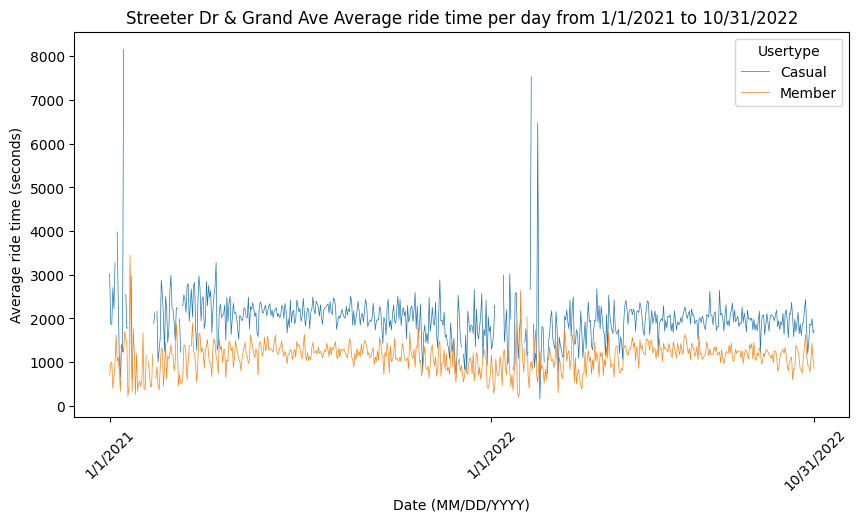

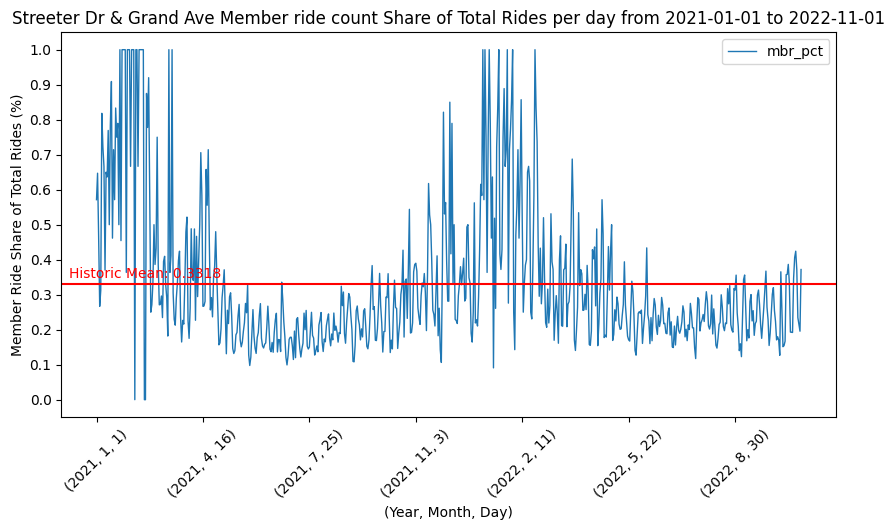

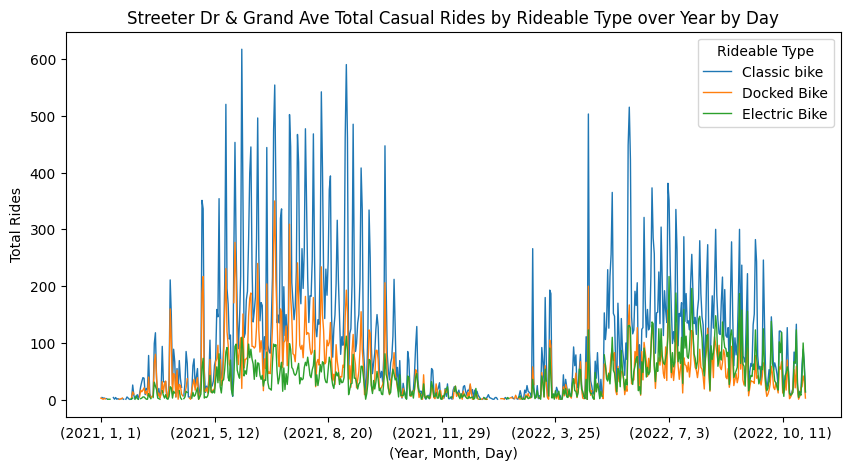

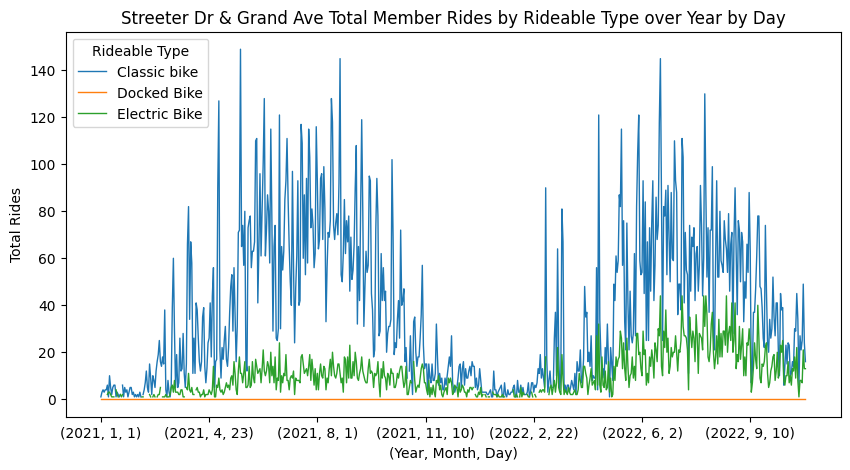

In [85]:
# can chose 'year', 'month', 'day' for time_level

single_station_ridetime_report(sta_name='Streeter Dr & Grand Ave', 
                               time_level='day',
                               start_date='2021-01-01',
                               ride_type='from')

single_station_rideable_type_report(sta_name='Streeter Dr & Grand Ave', 
                             time_level='day',
                             start_date='2021-01-01',
                             ride_type='from')

# Conclusion:

## Relevant Key Findings:

- Analyzing trip_duration is extremely important to make conclusive distinctions between Casual and Member riders. Across the network, casual riders on average take rides that are twice as long as member riders.


- Analyzing the member share of rides is extremely important because it allows us to figure out how stations are utilized: basically, are the utilized by members more than casual riders, less than casual riders, or is it a 50:50 split?


### In General (across the dataset):

- Over the past 3 years, the gap between the number of casual and member rides has decreased overall.


- For the past 4 years, average Casual Ride time has been decreasing while average Member ride time has remained relatively constant.


- Casual ride times tend to varry more than Member ride times; the distribution of Member ride times is more concentrated. This goes for casual vs member ride count as well: Member ride count is generally more concentrated than Casual ride count over time.


- Both Casual and Member rides peak during the warmer months of the year; late spring and the summer tend to have much higher numbers of both types of rides than other months of the year.


#### Rideable Type:

- For both groups, the share of rides that utilize electric bikes has been trending upwards over the last 2 years; Casual riders are quicker to adopt these new bikes than Member riders

- This may be due to how Divvy has chosen to replace classic bikes (i.e. if they target more popular stations that are predominantly casual rider frequented), or it may be down to preference.


#### Weekdays vs Weekends:

- The number of Casual Rides peaks on weekends, where it is 2-3 times higher than the average number of casual rides on week days.


- The number of Member rides decreases by a third on weekends, and hits a peak in the middle of the week on wendnesday.


- The average Casual ride time remains relatively similar during the week regardless of the day.


- The average Member ride time remains relatively similar during the week regardless of the day.


- Member ride peak hours are significantly different from Casual ride peak hours on week days, however they are very close on on weekends.


- Casual average ride time on week days varries greatly over the course of a day, and on weekends it also varries to a lesser but still noteable degree.


- Member average ride time on week days is close to constant, and on weekends it barely goes up during the afternoon to early in the night.


#### Location:

- Location matters, and is second to trip duration in terms of importance to identifying opportunities for casual conversion to member riders.


- Location needs to be highly scrutinized when deciding where to spend money, because it allows for a closer look at all of the aforementioned methods of breaking down our trip_duration data, which is the main way that we can distinguish prospective members from the average casual rider at a station.


## Suggestions for Casual to Member Conversion


### Main Suggestion: Unique Rider ID's

This should be implemented immediately. Having Unique Rider ID's would allow for much more in depth analysis of the behaviour of both members and casual riders on a station by station basis.

- Create unique rider id's for casual users based on their phone/payment method, use this to track how much they use service, if they use it a decent amount, send them a message along the lines of: ‘You’ve driven x amount of miles with divvy, if you join up you could save xx.xx on your projected future rides!


- Target Casual riders with rider id's on a station by station evalation basis. Basically, the more that their ride behaviour resembles the ride behaviour of a Member rider of the given station that they frequent, the more likely said Casual rider is to potentially purchase a Membership.


- Characteristics of Casual riders who are prospective Member riders:

    1. Casual riders that tend to use the service more on week days than week-ends
    
    2. Casual riders that ride closer to Member peak hours on week days
    
    3. Casual riders that repeat rides over the course of days/weeks/months at relatively similar times of the day (Especially if close to peak hours)

    4. Casual riders with a low variance on their ride times given a specific route/station trip as well as noteably lower ride times on average than the average overall casual ride time given a specific route/start-station.


### Suggestion 1: Age and Gender data

Age and Gender Data are actually fairly important; as we can see in the analysis sections above, members seem to be predominantly male and a bulk of the member rides occur within ages 20-50. I believe that if we had this data for member riders and casual riders more recently that may add more nuance to the data and help us to make distinctions between casual and member riders.


### Suggestion 2: Dpcapacity

I did not actually use the dpcapcity (maximum number of bikes available) at all in this analysis section. The reason I didn't use it is because the number is useless if there is no variable that represents the number of bikes actually present at a station during a given time.

This should be included in the data because it would allow us to more easily identify times when our bike network is experiencing higher than normal traffic, pinpoint expansion opportunities for additional bike capacity, etc.


### Suggestion 3: Marketing

Organize bike trips that are tours around Chicago landmarks for casual riders, contract with local businesses to guide tours to specific popular locations in Chicago.


### Suggestion 4: Pricing Plans

#### Current Pricing Plans:

From: 
https://divvybikes.com/pricing

Single ride: \\$1 to unlock + \\$0.16 a minute for non-members

Day pass: \\$15 a day + \\$0.16 a minute after 3 hours

Annual Membership: \\$10 a month for unlimited 45-min rides with \\$119 upfront annually

There is a big hole here, and it is for Annual Members.

In [86]:
columns = ['usertype', 'age', 'trip_duration']
conds = (bike_df['usertype'] == 1) & (bike_df['st_year'] == 2022)

bike_df[columns].loc[conds, 'trip_duration'].describe()

count    2.321488e+06
mean     7.401786e+02
std      6.641956e+02
min      1.000000e+00
25%      3.210000e+02
50%      5.500000e+02
75%      9.410000e+02
max      1.079200e+04
Name: trip_duration, dtype: float64

In [87]:
(740 + (664 * 2)) // 60

34

As you can see above, the mean trip duration for a member rider is roughly 12 minutes. 

Even 2 standard deviations greater than the mean at 12 minutes is only 2068 seconds, or 34 minutes. This means that almost all of our rides occur within 35 minutes, let alone the 45 minute ride time cap on an annual membership.

There could be an express version of the annual membership that offers a lower ride cap, a range of around 10-20 minutes (depending on how low the cap has to be to not be a net negative in terms of revenue for Divvy) that may end up being popular amongst a significant group of people, both riders and prospective members (casual or even simply just those who would use the service if it was cheaper). For example, it could be a lower upfront and/or monthly cost but a higher cost for rides that go over the cap per minute.

### Side notes:

- Improve the documentation and data quality. It is very unclear; for example, rideable type never clearly makes a distinction between classic and docked bikes, which is why I chose not to go into greater detail about the section in this analysis. 

- The data also includes many names that are variations of existing names, as well as stations that are not actual stations (used for testing bikes, storing them, etc.) and these should not be in the dataset. 

## Advanced Ideas:
These are suggestions that are beyond my capabilities or only possible/worth doing with more data. Especially with respect to Machine Learning, this is more brainstorming than anything else.


## Suggestions for potential ML model building:

1. Break data up by station, and don't bother trying to forecast for stations that don't have a significant number of rides for model building


2. Break the station's data up based on usertype, then aggregate values by [year, month, day, hour]


3. For that particular station, use existing features and create new features to forecast by usertype:
    - Year, Month, Day, Hour, Weekday (as in Mon, Tue, etc.), Rideable_type, if the day is a holiday, temperature, etc.


4. Use the overlap in forecasting predictions as a way to identify prime timeframes to advertise. The closer the forecast of our average casual values is to overlapping/the more our forecast of average casual values overlap, the more likely that there are riders suitable for conversion to bike network members that will be riding during the time frame.


## Bike Path Stream Mapping
Ideally, we could have this as a part of a dashboard graphic. If I had access to the location data of the bikes during each trip, I would map out the bike paths for each bike ride based on a chosen station and the x number of top associated stations.

We could represent a single origin station that maps to multiple end point stations, or multiple start stations that map to multiple end point stations.

I would map out the actual paths that each bike takes, and I would have a highlight in areas where trips tend to stop before reaching the end station. Using a method like this would provide a great amount of potential for determining potential differences between member and casual riders, and it could be very intuitive to follow the design of such a dashboard.


Potential for such a dashboard/analysis structure includes:

1. Bike path stream mapping
        - figuring out most popular route
        - deviations from most popular route, probability that a deviation will occur
        - possible classification of such deviations


2. Time spent behaviour
        - finding out where riders stop and how long they spend stopped
        - potentially figure out how they spend this time by analyzing time spent and proximity to different places where 
        people are likely to spend their time


3. Member/Casual Split
        - may be able to find out how bike path or time spent riding behavior differ based on the member/casual rider 
        classification split, even for riders with similar ride times and the same start/end destinations?


This could be achieved on a station query basis, and you could even analyze how all of these things differ based on time, the respective day/month/year and perhaps even figuring out long term trends, such as increases/decreases in the popularity of stops at certain areas. This could all be done visually through simply designing a time lapse presentation of a dashboard graphic as described above.

This could be used to identify prime businesses based on the bike path streams and contract with them to incentivise membership sign ups or ride pass purchases for casual riders.